In [ ]:
# Install visualization and monitoring tools
!pip install tensorboard  # For training visualization
!pip install pyLDAvis     # For interactive topic model visualization
!pip install wordcloud    # For word cloud generation
!pip install matplotlib   # For plotting

# Install NLP libraries
!pip install gensim             # For topic modeling (e.g., LDA)
!pip install emoji              # For emoji processing
!pip install fasttext           # For word embeddings (Facebook's fastText)
!pip install vaderSentiment     # For rule-based sentiment analysis
!pip install datasets           # For loading NLP datasets
!pip install transformers==4.31.0  # HuggingFace Transformers (specific version)
!pip install rouge_score        # For ROUGE evaluation metrics

# Download and extract pre-trained fastText English vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gzip -d cc.en.300.bin.gz

!pip install numpy==1.25        # Numerical operations (specific version)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you ha

In [ ]:
import numpy as np
print("NumPy version:", np.__version__)

NumPy version: 1.25.0


In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Sun Apr 20 08:07:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P8       

In [ ]:
# =======================
# Built-in and General
# =======================
import os
import re
import time
from collections import defaultdict, Counter

# =======================
# Data Handling & Visualization
# =======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
# =======================
# NLTK Setup
# =======================
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('tagsets') #add this line to download the list of tagset identifiers
nltk.download('punkt') # add this line to download the punkt sentence tokenizer
# =======================
# spaCy
# =======================
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS

# =======================
# Extra NLP Tools
# =======================
import emoji
from gensim.models import Word2Vec
import fasttext

# =======================
# Scikit-learn
# =======================
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# =======================
# TensorFlow / Keras
# =======================
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Dense, Dropout, LSTM, Bidirectional,
    Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D,
    Attention, AdditiveAttention, MultiHeadAttention,
    Concatenate, LayerNormalization, Add, TimeDistributed
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotUniform

# =======================
# PyTorch
# =======================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# =======================
# Transformers & Evaluation
# =======================
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from rouge_score import rouge_scorer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#data

In [ ]:
combined_df = pd.read_csv("/content/emotional_data.csv")
emotion_columns = combined_df.columns[9:]

combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df = combined_df.query("example_very_unclear != True")

emotion_dict = {}

for emotion in emotion_columns:
    emotion_entries = combined_df[combined_df[emotion] == 1].copy()

    for col in emotion_columns:
        if col != emotion:
            emotion_entries[col] = 0

    emotion_dict[emotion] = emotion_entries



with open("final_emotion_lexicon.json", "r", encoding="utf-8") as f:
    final_emotion_lexicon = json.load(f)

print(f"✅ Loaded lexicon with {len(final_emotion_lexicon)} emotions")


✅ Loaded lexicon with 28 emotions


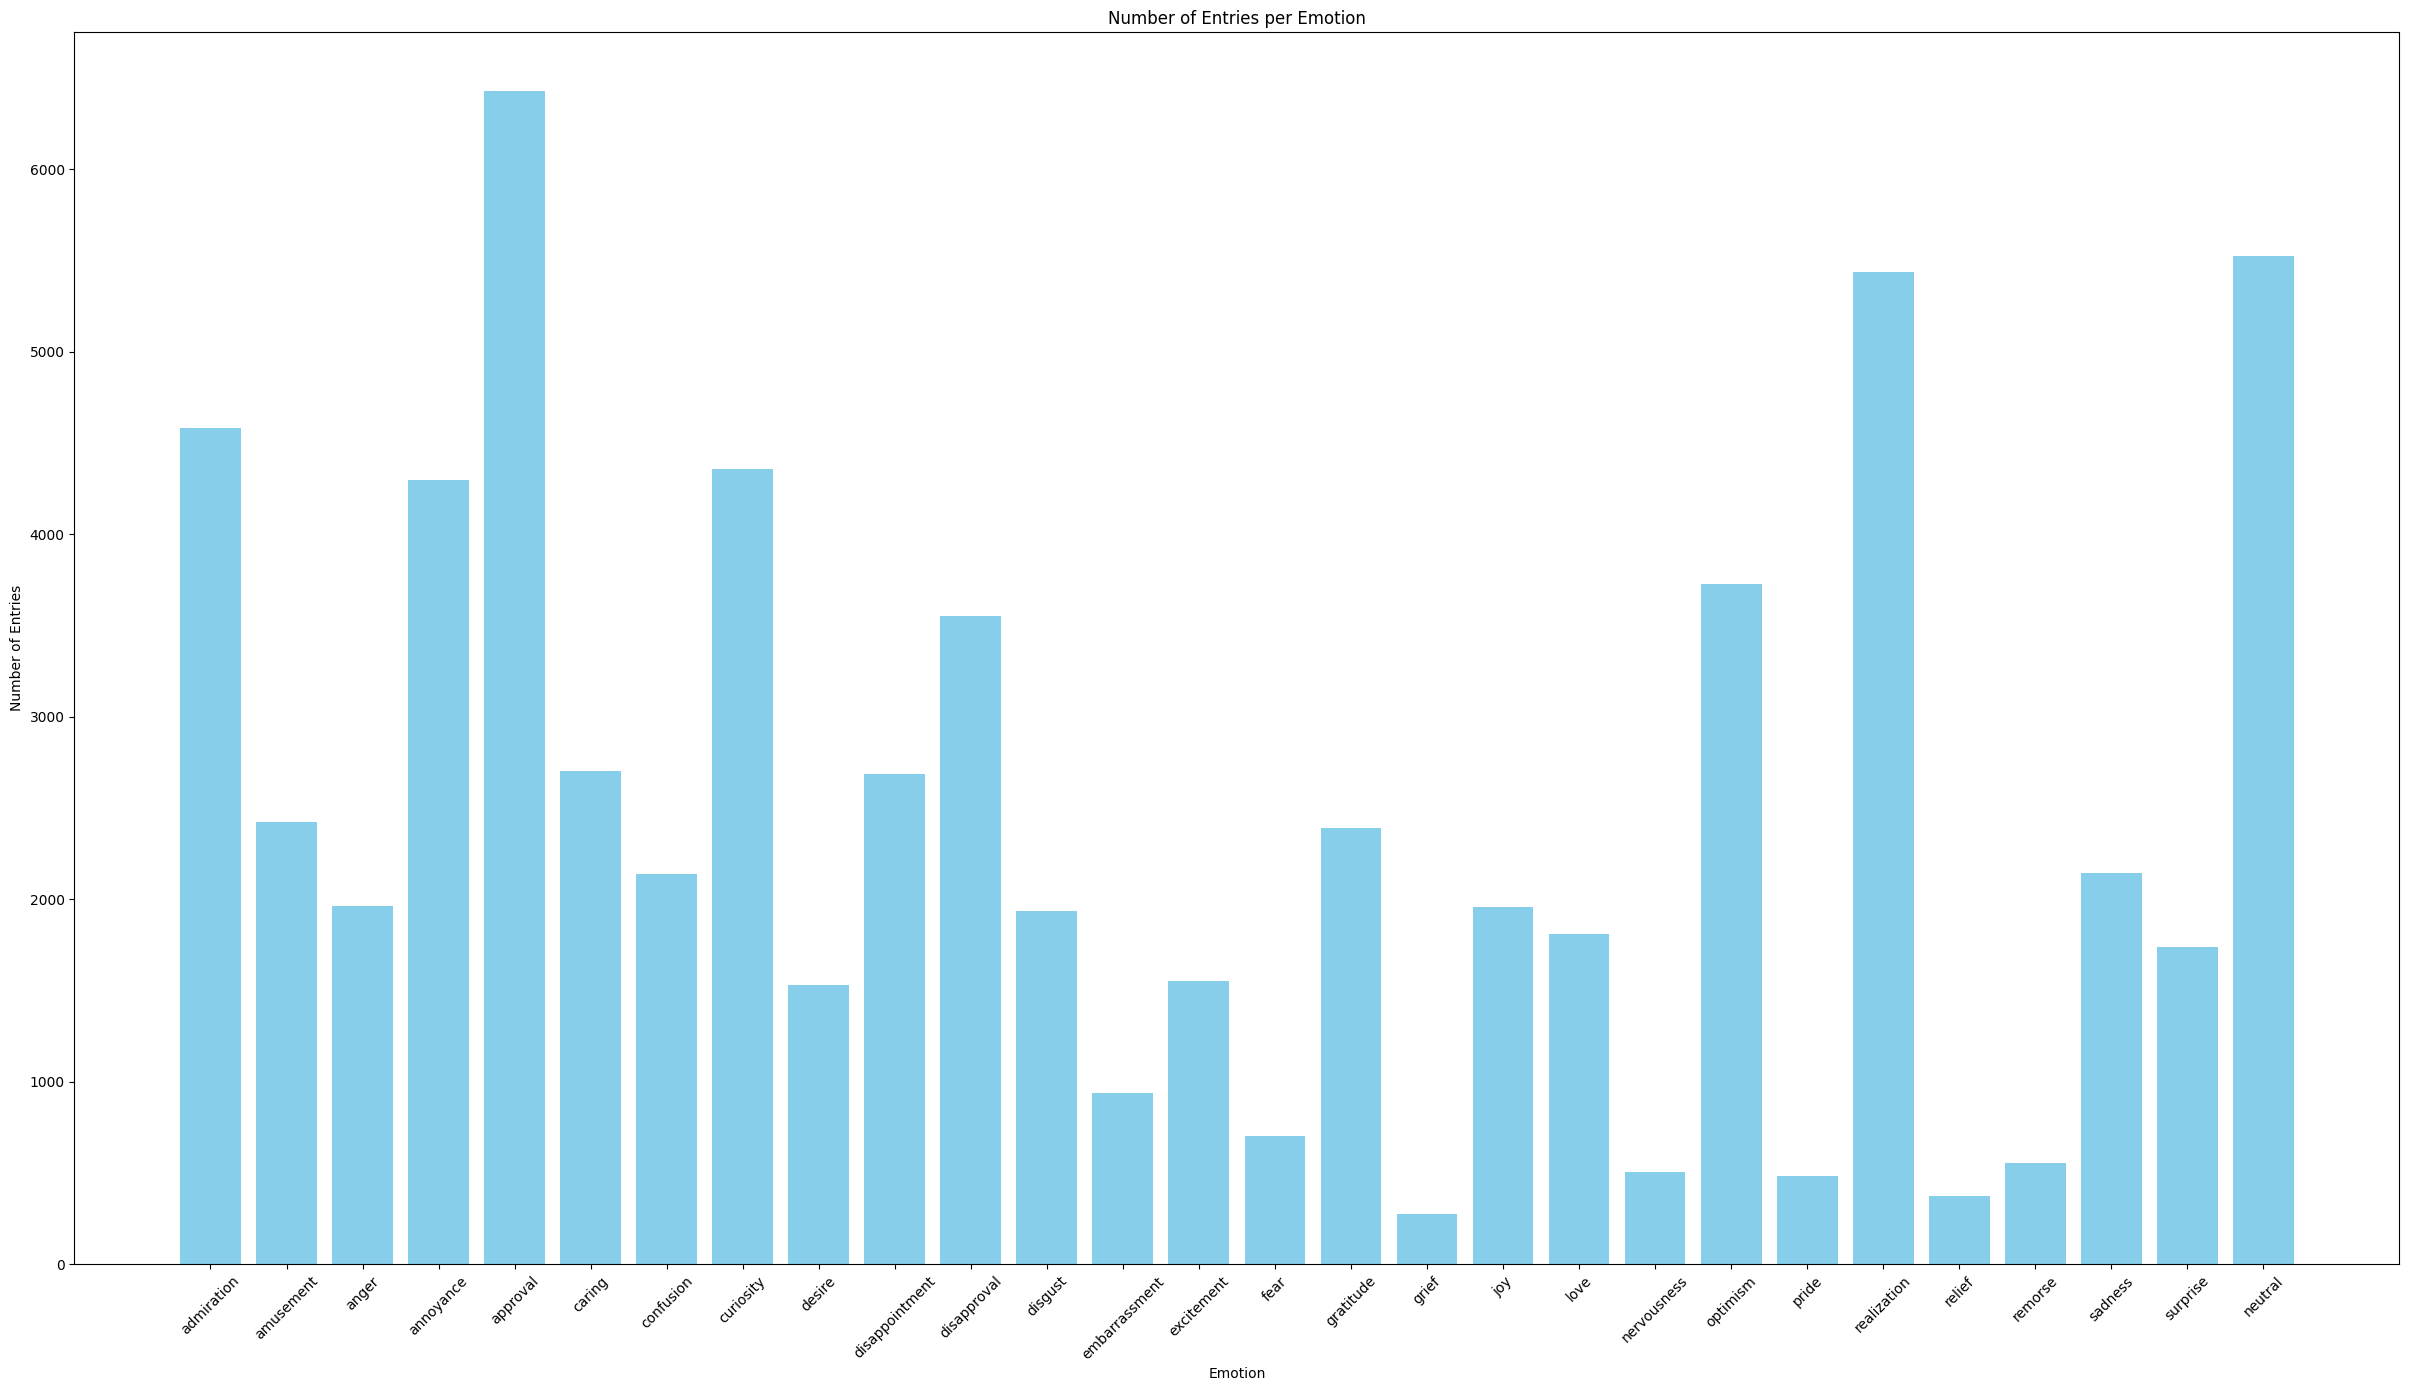

In [ ]:
emotions = list(emotion_dict.keys())
counts = [len(entries) for entries in emotion_dict.values()]

plt.figure(figsize=(30, 16))
plt.bar(emotions, counts, color="skyblue")
plt.xlabel("Emotion")
plt.ylabel("Number of Entries")
plt.title("Number of Entries per Emotion")
plt.xticks(rotation=45)
plt.show()

#Selecting the data for GAN

In [ ]:
def get_emotion_data(emotion_name, emotion_dict=emotion_dict, final_emotion_lexicon=final_emotion_lexicon):
    """
    Return the data and lexicon for a selected emotion.

    Args:
        emotion_name (str): The name of the emotion to retrieve (e.g., 'fear', 'joy').
        emotion_dict (dict): Dictionary mapping emotions to text samples.
        final_emotion_lexicon (dict): Dictionary mapping emotions to emotion-related words.

    Returns:
        data_emotion (list): List of text samples expressing the selected emotion.
        lexicon_emotion (list): List of emotion-related words for the selected emotion.
    """
    if emotion_name not in emotion_dict:
        print(f"Emotion '{emotion_name}' not found in data.")
        return [], []

    data_emotion = emotion_dict[emotion_name]
    lexicon_emotion = final_emotion_lexicon.get(emotion_name, [])

    print(f"🔍 Emotion selected: '{emotion_name}'")
    print(f"📄 Number of sentences: {len(data_emotion)}")
    print(f"🧠 Lexicon words available: {len(lexicon_emotion)}")

    return data_emotion, lexicon_emotion


data , lexicon= get_emotion_data('fear')


🔍 Emotion selected: 'fear'
📄 Number of sentences: 704
🧠 Lexicon words available: 238


In [ ]:

def summarize_rater_contributions(combined_df):
    """
    Display and return the number of annotations per rater.
    """
    rater_counts = combined_df['rater_id'].value_counts()
    print("Number of annotations per rater:")
    print(rater_counts)
    return rater_counts

rater = summarize_rater_contributions(data)

Number of annotations per rater:
rater_id
61    86
15    77
38    62
42    61
31    50
37    50
9     42
34    33
56    33
3     32
66    30
19    25
63    24
11    23
54    22
79    17
7     17
73    15
48     5
Name: count, dtype: int64


In [ ]:
# Dictionary to store emojis with their positions and texts
emoji_dict = {}

# Function to extract emojis and build the dictionary
def build_emoji_dict(df):
    for idx, row in df.iterrows():
        text = row['text']
        for char in text:
            if emoji.is_emoji(char):
                if char not in emoji_dict:
                    emoji_dict[char] = []
                emoji_dict[char].append((idx, text))
build_emoji_dict(data)
len(emoji_dict)

6

#preproces

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[<>]", "", text)
    text = f"<start> {text} <end>"
    text = re.sub(r'\[(\w+)\]', r'<\1>', text)
    text = emoji.demojize(text)
    text = re.sub(r"[^a-z0-9<>!?.,;:\'\" \n\t]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

data['processed_text'] = data['text'].apply(preprocess_text)

print(data[['text', 'processed_text']].head())

                                                  text  \
185  Oh gosh that's no good! Perhaps the other opti...   
199                                    FEAR THE TURTLE   
286  I find that relatable: I too am terrified of m...   
296                                         Disaster!!   
475  Omg [NAME] I can't stand Orange anymore after ...   

                                        processed_text  
185  <start> oh gosh that's no good! perhaps the ot...  
199                      <start> fear the turtle <end>  
286  <start> i find that relatable: i too am terrif...  
296                           <start> disaster!! <end>  
475  <start> omg <name> i can't stand orange anymor...  


In [ ]:
def create_mappings(df, special_tokens=None):
    if special_tokens is None:
        # Standard tokens – all lowercase to avoid mismatches
        special_tokens = ['<pad>', '<oov>', '<start>', '<end>']

    word_to_index = {}
    index_to_word = {}

    # Add special tokens first
    for token in special_tokens:
        idx = len(word_to_index)
        word_to_index[token] = idx
        index_to_word[idx] = token

    # Add remaining words from data
    index_counter = len(word_to_index)
    for text in df['processed_text']:
        words = text.split()
        for word in words:
            if word not in word_to_index:
                word_to_index[word] = index_counter
                index_to_word[index_counter] = word
                index_counter += 1

    return word_to_index, index_to_word


def create_word_vectors(sentences, fasttext_model, word_to_index, embedding_dim=300):
    word_vectors = {}

    for sentence in sentences:
        for word in sentence:
            if word not in word_vectors:
                word_vectors[word] = fasttext_model.get_word_vector(word)

    # Ensure all tokens from the index are covered (including special ones)
    for word in word_to_index:
        if word not in word_vectors:
            word_vectors[word] = np.random.uniform(-0.01, 0.01, embedding_dim)

    return word_vectors


sentences = data['processed_text'].apply(lambda x: x.split())

word_to_index, index_to_word = create_mappings(data)

fasttext_model = fasttext.load_model('/content/cc.en.300.bin')
embedding_dim = 300
word_vectors = create_word_vectors(sentences, fasttext_model, word_to_index, embedding_dim=embedding_dim)

print("✅ Token mappings:")
for token in ['<pad>', '<oov>', '<start>', '<end>']:
    print(f"{token}: index = {word_to_index[token]}, vector shape = {word_vectors[token].shape}")
def text_to_index_sequence(text, word_to_index):
    words = text.split()
    index_sequence = [word_to_index.get(word, word_to_index['<oov>']) for word in words]
    return index_sequence
data['text_as_indexes'] = data['processed_text'].apply(lambda x: text_to_index_sequence(x, word_to_index))
print(data[['text', 'processed_text', 'text_as_indexes']].head())

✅ Token mappings:
<pad>: index = 0, vector shape = (300,)
<oov>: index = 1, vector shape = (300,)
<start>: index = 2, vector shape = (300,)
<end>: index = 3, vector shape = (300,)
                                                  text  \
185  Oh gosh that's no good! Perhaps the other opti...   
199                                    FEAR THE TURTLE   
286  I find that relatable: I too am terrified of m...   
296                                         Disaster!!   
475  Omg [NAME] I can't stand Orange anymore after ...   

                                        processed_text  \
185  <start> oh gosh that's no good! perhaps the ot...   
199                      <start> fear the turtle <end>   
286  <start> i find that relatable: i too am terrif...   
296                           <start> disaster!! <end>   
475  <start> omg <name> i can't stand orange anymor...   

                                       text_as_indexes  
185  [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...  
199     

##embedding_matrix

In [ ]:

vocab_size = len(word_to_index) + 1
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in word_to_index.items():
    if word in word_vectors:
        embedding_matrix[idx] = word_vectors[word]
    else:
        embedding_matrix[idx] = np.random.uniform(-0.01, 0.01, embedding_dim)
print("✅ Embedding matrix shape:", embedding_matrix.shape)


✅ Embedding matrix shape: (2649, 300)


#SeqGAN

##Pretraining  for Generator

In [ ]:

vocab_size = len(word_to_index) + 1
embedding_dim = 300
max_length = 20
def build_generator(vocab_size, embedding_dim, max_length, embedding_matrix):
    model = Sequential(name="Generator")
    model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))
    model.add(LSTM(256, return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dense(vocab_size, activation='softmax'))
    return model
generator = build_generator(vocab_size, embedding_dim, max_length, embedding_matrix)
generator.compile(optimizer=Adam(0.001), loss='categorical_crossentropy')
generator.summary()


def create_generator_training_data(index_sequences, max_length):
    X, y = [], []
    for seq in index_sequences:
        if len(seq) < 2:
            continue
        input_seq = seq[:-1]
        target_seq = seq[1:]

        X.append(input_seq)
        y.append(target_seq)

    X = pad_sequences(X, maxlen=max_length, padding='post')
    y = pad_sequences(y, maxlen=max_length, padding='post')
    return np.array(X), np.array(y)


def one_hot_targets(y, vocab_size):
    y_oh = np.array([to_categorical(seq, num_classes=vocab_size) for seq in y])
    return y_oh

index_sequences = data['text_as_indexes'].tolist()
X_gen, y_gen = create_generator_training_data(index_sequences, max_length)
y_gen_oh = one_hot_targets(y_gen, vocab_size)

generator = build_generator(vocab_size, embedding_dim, max_length, embedding_matrix)
generator.compile(optimizer='adam', loss='categorical_crossentropy')

print("🚀 Starting generator pretraining...")
with tf.device('/GPU:0'):
    print("🚀 Starting generator pretraining on GPU...")
    generator.fit(X_gen, y_gen_oh, batch_size=64, epochs=10, verbose=1)



    # Real samples
real_samples = data['text_as_indexes'].sample(n=min(1000, len(data)), replace=False).tolist()
real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')

# Fake samples
def generate_samples_efficient(generator, num_samples, max_length):
    start_token = word_to_index.get('<start>', 1)
    samples = np.full((num_samples, max_length), word_to_index.get('<pad>', 0))
    samples[:, 0] = start_token

    for t in range(1, max_length):
        preds = generator.predict(samples, verbose=0)
        next_tokens = [np.random.choice(range(len(preds[i][t - 1])), p=preds[i][t - 1]) for i in range(num_samples)]
        samples[:, t] = next_tokens

    return samples


with tf.device('/GPU:0'):
    fake_samples = generate_samples_efficient(generator, 1000, max_length)
    print("🔎 Real sample example (indexed):", real_samples[0])
decoded = [index_to_word.get(i, "<unk>") for i in real_samples[0]]
print("📝 Decoded real sample:", " ".join(decoded))

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │       794,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,700 (3.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 794,700 (3.03 MB)

🚀 Starting generator pretraining...
🚀 Starting generator pretraining on GPU...
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 7.5645
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.1958
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1736
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9795
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0266
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0147
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9181
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8103
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8856
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8437
🔎 Real sample example (indexed): [  2 127 285 816  16 817 123  22 818 150 819  81 820 821 822   3   0   0
   0   0]
📝 Decoded real sample: <start> it'll be hard to surive on that wage in vancouver. it's expensive af here. <end> <pad> <pad> <pad> <pad>


##Pretraining discriminator

In [ ]:
def build_discriminator(vocab_size, embedding_dim, max_length):
    model = Sequential(name="Discriminator")
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        trainable=False))
    model.add(Conv1D(64, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


discriminator = build_discriminator(vocab_size, embedding_dim, max_length)
discriminator.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Labeling
X = np.concatenate([real_samples, fake_samples], axis=0)
y = np.concatenate([np.ones(len(real_samples)), np.zeros(len(fake_samples))], axis=0)

from sklearn.utils import shuffle
X, y = shuffle(X, y)

# Train
print("🧠 Training Discriminator...")
discriminator.fit(X, y, batch_size=64, epochs=10, verbose=1)

loss, accuracy = discriminator.evaluate(X, y, verbose=0)
print(f"✅ Discriminator Accuracy: {accuracy:.4f}")
print(f"📉 Discriminator Loss: {loss:.4f}")

🧠 Training Discriminator...
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6663 - loss: 0.6655
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.4732
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9413 - loss: 0.2424
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.1006
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0492
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0246
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0156
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0101
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9998 - loss: 0.0062
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0061
✅ Discriminator Accuracy: 0.9994
📉 Discriminator Loss: 0.0042


#dual discriminator

In [ ]:

def build_dual_discriminator(vocab_size, embedding_dim, max_length, embedding_matrix):
    input_seq = Input(shape=(max_length,), name='input_tokens')

    x = Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  trainable=False)(input_seq)
    x = Conv1D(64, kernel_size=5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    # 🔹 Real/Fake Head
    real_fake_output = Dense(1, activation='sigmoid', name='real_fake_output')(x)

    # 🔹 Emotion (Fear) Head – Binary
    emotion_output = Dense(1, activation='sigmoid', name='emotion_output')(x)

    model = Model(inputs=input_seq, outputs=[real_fake_output, emotion_output])
    return model



disc_model = build_dual_discriminator(vocab_size, embedding_dim, max_length, embedding_matrix)

disc_model.compile(
    optimizer=Adam(0.001),
    loss={
        'real_fake_output': 'binary_crossentropy',
        'emotion_output': 'binary_crossentropy'
    },
    loss_weights={
        'real_fake_output': 1.0,
        'emotion_output': 1.5
    },
    metrics={
        'real_fake_output': 'accuracy',
        'emotion_output': 'accuracy'
    }
)


n_samples = min(1000, len(data))
real_samples = data['text_as_indexes'].sample(n=n_samples, random_state=42).tolist()
real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')

y_real = np.ones((len(real_samples), 1))
y_emotion_real = np.ones((len(real_samples), 1))


def generate_samples_efficient(generator, num_samples, max_length):
    start_token = word_to_index.get('<start>', 1)
    pad_token = word_to_index.get('<pad>', 0)
    samples = np.full((num_samples, max_length), pad_token)
    samples[:, 0] = start_token

    for t in range(1, max_length):
        preds = generator.predict(samples, verbose=0)
        next_tokens = [
            np.random.choice(len(preds[i][t - 1]), p=preds[i][t - 1])
            for i in range(num_samples)
        ]
        samples[:, t] = next_tokens

    return samples

fake_samples = generate_samples_efficient(generator, num_samples=n_samples, max_length=max_length)
y_fake = np.zeros((len(fake_samples), 1))
y_emotion_fake = np.zeros((len(fake_samples), 1))


X = np.concatenate([real_samples, fake_samples], axis=0)
y_real_combined = np.concatenate([y_real, y_fake], axis=0)
y_emotion_combined = np.concatenate([y_emotion_real, y_emotion_fake], axis=0)

X, y_real_combined, y_emotion_combined = shuffle(X, y_real_combined, y_emotion_combined)


disc_model.fit(
    X,
    {
        'real_fake_output': y_real_combined,
        'emotion_output': y_emotion_combined
    },
    batch_size=64,
    epochs=10,
    verbose=1
)




Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - emotion_output_accuracy: 0.5555 - emotion_output_loss: 0.6754 - loss: 1.7015 - real_fake_output_accuracy: 0.5208 - real_fake_output_loss: 0.6885
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - emotion_output_accuracy: 0.7848 - emotion_output_loss: 0.5705 - loss: 1.4801 - real_fake_output_accuracy: 0.7052 - real_fake_output_loss: 0.6244
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - emotion_output_accuracy: 0.9101 - emotion_output_loss: 0.3969 - loss: 1.0911 - real_fake_output_accuracy: 0.8310 - real_fake_output_loss: 0.4958
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - emotion_output_accuracy: 0.9420 - emotion_output_loss: 0.2332 - loss: 0.6598 - real_fake_output_accuracy: 0.9169 - real_fake_output_loss: 0.3101
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - emotion_output_accuracy: 0.9690 - emotion_output_loss: 0.1282 - loss: 0.3720 - real_fake_output_accuracy: 0.9532 - real_fake_output_loss: 0.1796
Epoch 6/10
22/2

#perplexity

In [ ]:

tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
model = GPT2LMHeadModel.from_pretrained("gpt2-large")
model.eval()

def compute_perplexity(sentence):
    input_ids = tokenizer.encode(sentence, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    return torch.exp(loss).item()

# Test example
test_sentences = [
    "I am very scared of the dark.",
    "The the the to and a the is.",
    "Panic attacks can happen unexpectedly."
]

for i, s in enumerate(test_sentences, 1):
    pp = compute_perplexity(s)
    print(f"🔢 Sentence #{i} | Perplexity: {pp:.2f} | Text: {s}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


🔢 Sentence #1 | Perplexity: 31.13 | Text: I am very scared of the dark.
🔢 Sentence #2 | Perplexity: 331.24 | Text: The the the to and a the is.
🔢 Sentence #3 | Perplexity: 46.20 | Text: Panic attacks can happen unexpectedly.


#bleu,self_bleu,distinct_n

In [ ]:
def compute_bleu(candidate, references):
    tokenizer = lambda s: s.split()
    candidate_tokens = tokenizer(candidate)
    references_tokens = [tokenizer(ref) for ref in references]
    smoothie = SmoothingFunction().method4
    return sentence_bleu(references_tokens, candidate_tokens, smoothing_function=smoothie)

def compute_self_bleu(texts):
    tokenizer = lambda s: s.split()
    smoothie = SmoothingFunction().method4
    scores = []

    for i in range(len(texts)):
        candidate = texts[i]
        references = texts[:i] + texts[i+1:]
        candidate_tokens = tokenizer(candidate)
        references_tokens = [tokenizer(ref) for ref in references]
        bleu_score = sentence_bleu(references_tokens, candidate_tokens, smoothing_function=smoothie)
        scores.append(bleu_score)

    return sum(scores) / len(scores) if scores else 0.0

def compute_distinct_n(texts, n=1):
    tokenizer = lambda s: s.split()
    all_ngrams = set()
    total_ngrams = 0

    for text in texts:
        tokens = tokenizer(text)
        ngrams = list(zip(*[tokens[i:] for i in range(n)]))
        all_ngrams.update(ngrams)
        total_ngrams += len(ngrams)

    return len(all_ngrams) / total_ngrams if total_ngrams > 0 else 0.0

texts = [
    "I am very scared of the dark.",
    "Panic attacks can happen unexpectedly.",
    "I feel overwhelmed and anxious at times."
]

blue_score = compute_bleu(candidate=texts[0], references=texts[1:])
print(f"🔷 BLEU Score: {blue_score:.4f}")

self_blue_score = compute_self_bleu(texts)
print(f"🌀 Self-BLEU Score: {self_blue_score:.4f}")

distinct_1 = compute_distinct_n(texts, n=1)
distinct_2 = compute_distinct_n(texts, n=2)
print(f"🌿 Distinct-1: {distinct_1:.4f}")
print(f"🌱 Distinct-2: {distinct_2:.4f}")



🔷 BLEU Score: 0.0324
🌀 Self-BLEU Score: 0.0216
🌿 Distinct-1: 0.9474
🌱 Distinct-2: 1.0000


#ROUGE

In [ ]:
def compute_rouge(candidate, references):
    """
    Compute ROUGE score between candidate and references.
    The ROUGE score is used to measure the overlap between generated text and reference text.
    """
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    scores = []

    for ref in references:
        score = scorer.score(ref, candidate)
        scores.append(score)

    # Aggregate the scores (mean of each ROUGE type)
    avg_scores = {key: sum([score[key].fmeasure for score in scores]) / len(scores) for key in scores[0].keys()}

    return avg_scores
candidate = "the quick brown fox jumps over the lazy dog"
references = [
    "a fast brown fox leaps over the lazy dog",
    "the quick brown fox jumps over a lazy dog"
]

rouge_scores = compute_rouge(candidate, references)
print(rouge_scores)


{'rouge1': 0.7777777777777777, 'rouge2': 0.625, 'rougeL': 0.7777777777777777}


#Emotional index

In [ ]:
def analyze_emotion_score(text, lexicon=lexicon):
    words = text.lower().split()
    if not words:
        return 0.0

    strong_matches = sum(1 for w in words if w in lexicon)
    ratio = strong_matches / (len(words) ** 0.5)
    return min(1.0, round(ratio, 4))
print(analyze_emotion_score("I am terrified and horrified of the dark shadows."))


1.0


In [ ]:


# Stopwords minus negations
negation_words = {
    "no", "not", "never", "none", "nobody", "nothing", "neither", "nowhere", "nor",
    "can't", "cannot", "won't", "don't", "doesn't", "didn't", "isn't", "aren't",
    "wasn't", "weren't", "wouldn't", "shouldn't", "couldn't", "haven't", "hasn't", "hadn't"
}
stop_words = set(stopwords.words("english")) - negation_words

# Example generic/common words
generic_words = {"thing", "something", "someone", "everything", "anything", "going", "really", "just", "well", "get"}

def analyze_emotion_score(text, lexicon_words=None, word_vectors=None,
                          threshold=0.3, lexicon_weight=1.0, similar_weight=0.7,
                          penalty_factor=0.5, max_penalty=0.3, verbose=True):

    if lexicon_words is None or word_vectors is None:
        raise ValueError("Lexicon and word vectors must be provided.")

    # Tokenize and filter
    raw_words = re.findall(r'\b\w+\b', text.lower())
    words = [w for w in raw_words if w not in stop_words]
    if not words:
        return 0.0

    # Precompute lexicon vectors
    lexicon_vecs = [word_vectors[w] for w in lexicon_words if w in word_vectors]
    if not lexicon_vecs:
        return 0.0

    total_score = 0.0
    weight_sum = 0.0

    contributing_words = []

    for i, word in enumerate(words):
        position_weight = 1.0 - (i / len(words))  # earlier words weigh more
        word_score = 0.0
        reason = ""

        if word in lexicon_words:
            word_score = lexicon_weight
            reason = "lexicon"
        elif word in word_vectors:
            similarities = cosine_similarity([word_vectors[word]], lexicon_vecs)[0]
            max_sim = max(similarities)
            if max_sim >= threshold:
                word_score = similar_weight
                reason = f"similar ({round(max_sim, 2)})"

        # Apply soft penalty for generic words
        if word in generic_words and word_score > 0:
            word_score = min(word_score * penalty_factor, max_penalty)
            reason += " (penalized)"

        if word_score > 0:
            total_score += word_score * position_weight
            weight_sum += position_weight
            contributing_words.append((word, reason))

    # Verbose logging
    if verbose:
        print("Words contributing to emotion score:")
        for word, why in contributing_words:
            print(f"  - {word} ({why})")
        print(f"Total contributing words: {len(contributing_words)} / {len(words)}")

    return round(total_score / weight_sum, 4) if weight_sum > 0 else 0.0




score = analyze_emotion_score(
    "going it this is have a that",
    lexicon_words=lexicon,
    word_vectors=word_vectors
)
print("Fear Score:", score)

Words contributing to emotion score:
  - going (similar (0.550000011920929) (penalized))
Total contributing words: 1 / 1
Fear Score: 0.3


#saliency

In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
import re
import numpy as np

# Define stopwords, excluding important negation words
stop_words = set(stopwords.words("english"))
negation_words = {"not", "no", "never", "nothing", "nobody"}
stop_words -= negation_words

# Define weights for POS tags (adjectives, adverbs, verbs, nouns)
POS_WEIGHTS = {
    "JJ": 1.3,  # Adjective
    "RB": 1.2,  # Adverb
    "VB": 1.1,  # Verb
    "NN": 1.0   # Noun
}

# Basic text cleaning and stopword removal
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return [w for w in text.split() if w not in stop_words]

# Saliency score based on POS, position, and negation
def compute_saliency_score(text, debug=False):
    words = clean_and_tokenize(text)
    if not words:
        return 0.0

    tagged_words = pos_tag(words)
    total_score = 0.0

    for idx, (word, tag) in enumerate(tagged_words):
        # Weight based on POS tag prefix (e.g., 'JJ', 'VB', etc.)
        pos_prefix = tag[:2]
        pos_weight = POS_WEIGHTS.get(pos_prefix, 0.8)  # Use default if not found

        # Boost for early or ending words in the sentence
        position_weight = 1.2 if idx < 2 or idx >= len(words) - 2 else 1.0

        # Negation detection (previous word is a negation)
        is_negated = idx > 0 and words[idx - 1] in negation_words
        polarity = -1 if is_negated else 1

        # Final contribution of the token
        token_score = pos_weight * position_weight * polarity
        total_score += token_score

    # Normalize by sentence length
    norm_score = total_score / (len(words) ** 0.5)
    final_score = round(min(1.0, max(0.0, norm_score)), 4)

    if debug:
        print(f"🧠 Text: {text}")
        print(f"🧹 Cleaned Tokens: {words}")
        print(f"🔎 Counted Tokens: {len(words)}")
        print(f"🔥 Raw Saliency: {round(total_score, 4)} | Final Score: {final_score}")

    return final_score

text = "I'm not afraid, I'm absolutely terrified and deeply worried."
score = compute_saliency_score(text, debug=True)


🧠 Text: I'm not afraid, I'm absolutely terrified and deeply worried.
🧹 Cleaned Tokens: ['im', 'not', 'afraid', 'im', 'absolutely', 'terrified', 'deeply', 'worried']
🔎 Counted Tokens: 8
🔥 Raw Saliency: 7.64 | Final Score: 1.0


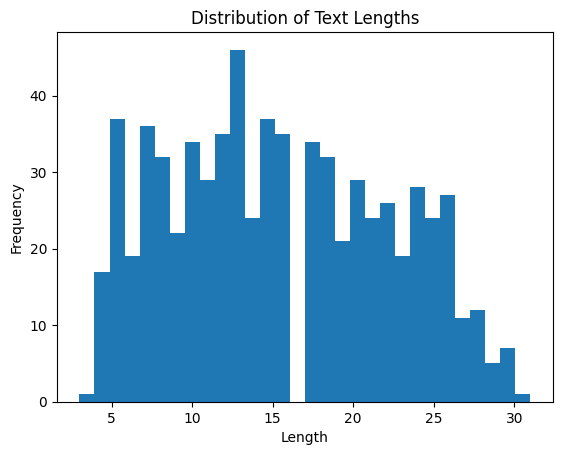

In [ ]:
import matplotlib.pyplot as plt
lengths = data['text_as_indexes'].apply(len)
plt.hist(lengths, bins=30)
plt.title("Distribution of Text Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#the seqGAN

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


🔥 Pretraining Generator...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 7.5226
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.0189
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3159
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8760
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6094
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.5424
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2858
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1814
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0327
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.9978
Restoring model weights from the end of the best epoch: 10.
📝 Generated sentence: <start> there pool. of gross am wooshing roommate youve corrupt had once but commuting
🔥 Boost training for dual discriminator before RL...
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - emotion_output_accuracy: 0.5063 - e

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


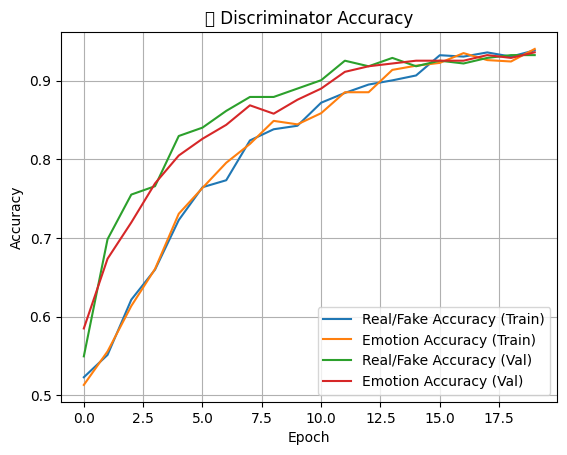

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


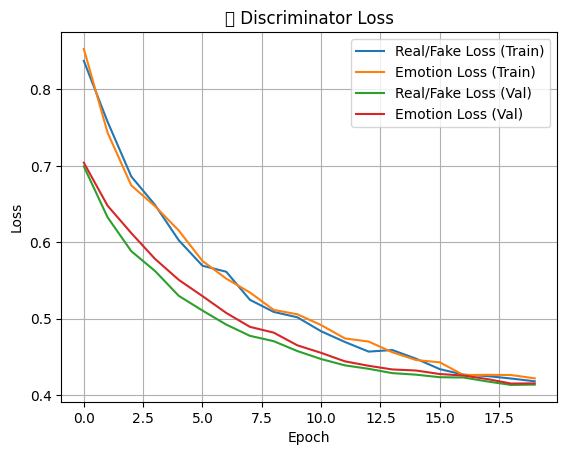

🔁 Fine-Tuning Discriminator (Batch-level)...
🔁 Fine-Tuning Discriminator (Batch-level)...
📊 Losses Log:
 epoch d_real_fake_loss d_emotion_loss real_fake_acc emotion_acc total_loss
     1       0.67970693     0.44896722    0.90735066  0.27565083  1.8868984
     2       0.68399763     0.44116122    0.91716737  0.19656652  1.9105315
     3       0.68285525     0.43792963    0.91741204  0.16547406  1.9166743
     4        0.6830655     0.43776506     0.9166286  0.14892645  1.9223051
     5        0.6779311     0.43735477    0.91688263  0.14050351  1.9204444
     6        0.6772174     0.43789282     0.9159664  0.13336445  1.9226999
     7        0.6717166     0.43742612    0.91744965  0.12778524  1.9185381
     8        0.6707296     0.43681073    0.91810244  0.12379042  1.9181085
     9        0.6713378      0.4359572    0.91998315   0.1205517  1.9186668
    10       0.66918284     0.43537518     0.9208325  0.11870367  1.9166579


<ipython-input-127-9a80086d4783>:423: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


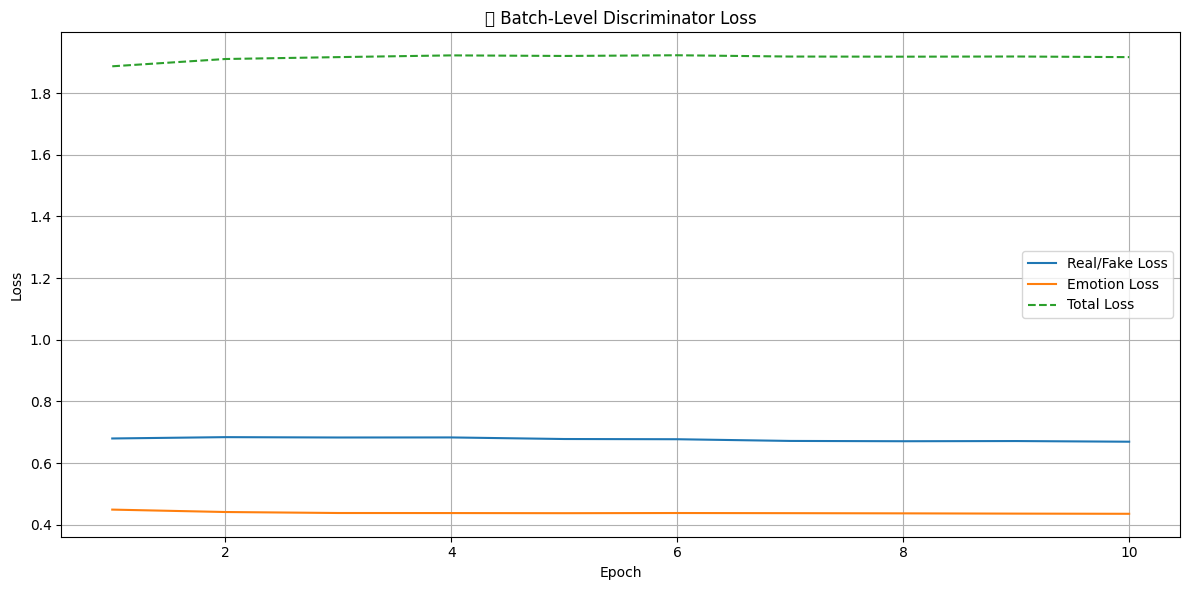

🚀 Starting SeqGAN Reinforcement Learning training...
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0725 | Combined Reward Mean: 0.5612
🧪 Distinct-1: 0.6459 | Distinct-2: 0.9893
🎮 Epoch 001 | G_Loss: 2.0370 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.5612
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.1156 | Combined Reward Mean: 0.5573
🧪 Distinct-1: 0.6244 | Distinct-2: 0.9917
🎮 Epoch 002 | G_Loss: 2.2023 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.5573
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0725 | Combined Reward Mean: 0.6697
🧪 Distinct-1: 0.6361 | Distinct-2: 0.9830
🎮 Epoch 003 | G_Loss: 2.1198 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.6697
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0725 | Combined Reward Mean: 0.5738
🧪 Distinct-1: 0.6281 | Distinct-2: 0.9875
🎮 Epoch 004 | G_Loss: 2.0694 | D_Loss: 0.0000 | D_Acc:

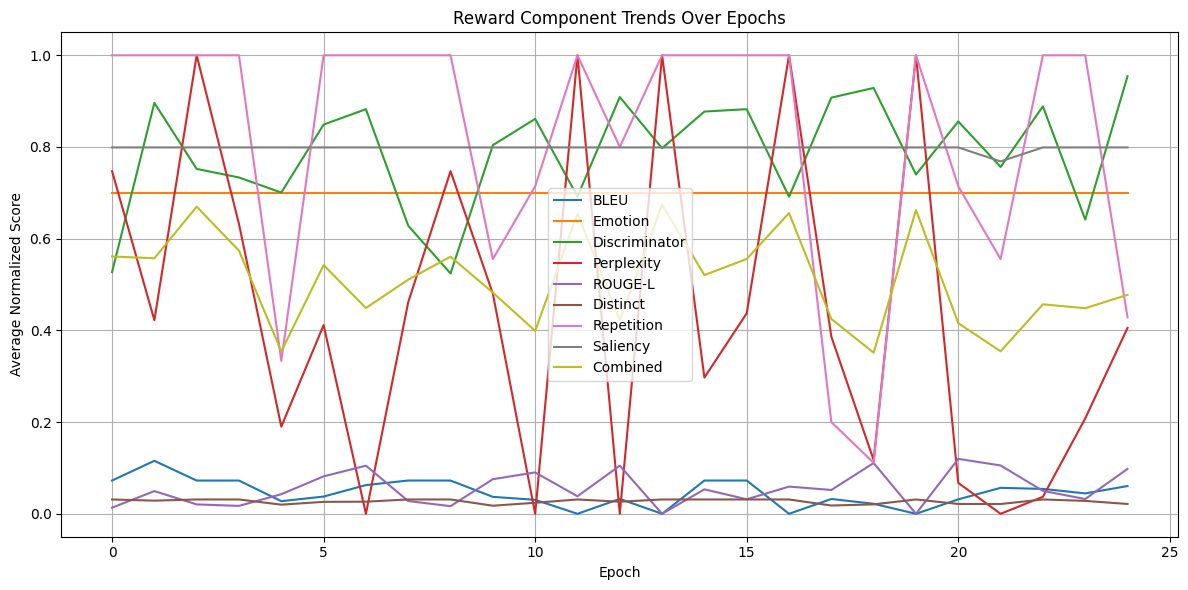

🧪 Distinct-1: 0.6091 | Distinct-2: 0.9898
📝 Sample #1: <start> the offensive, future. slightly <end> think will worries
📝 Sample #2: <start> it'll all solidarity, gag. horrible.
📝 Sample #3: <start> <end> basically wanted nothing him? truly reciprocate.
🎮 Epoch 025 | G_Loss: 2.3652 | D_Loss: 1.9127 | D_Acc: 0.9204 | Reward: 0.4776
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0326 | Combined Reward Mean: 0.4169
🧪 Distinct-1: 0.6154 | Distinct-2: 0.9887
🎮 Epoch 026 | G_Loss: 2.2921 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.4169
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0000 | Combined Reward Mean: 0.6544
🧪 Distinct-1: 0.6571 | Distinct-2: 0.9893
🎮 Epoch 027 | G_Loss: 2.0295 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.6544
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0498 | Combined Reward Mean: 0.2936
🧪 Distinct-1: 0.6129 | Distinct-2: 0.9865
🎮 Epoch 028 | G_L

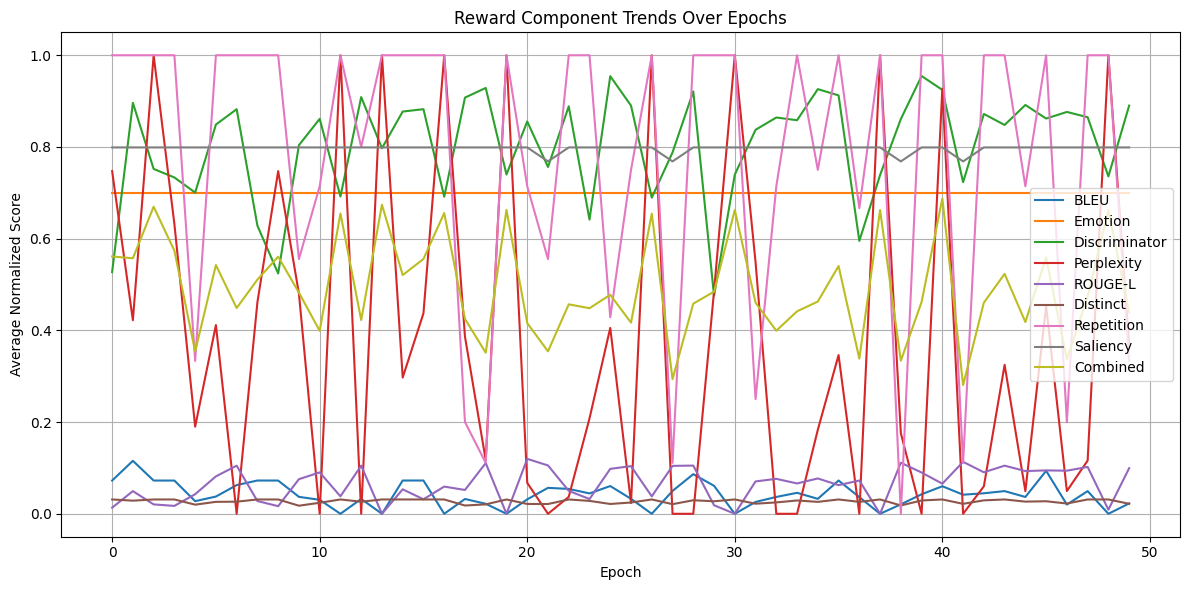

🧪 Distinct-1: 0.5843 | Distinct-2: 0.9830
📝 Sample #1: <start> as zach actually dog stuck 80 thinking attacks 2020 the
📝 Sample #2: <start> definitely insecure migraines state gullible soon:
📝 Sample #3: <start> idiot ugly turn ifs
🎮 Epoch 050 | G_Loss: 2.5857 | D_Loss: 1.9085 | D_Acc: 0.9200 | Reward: 0.4394
💾 Checkpoint saved at epoch 50!
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0725 | Combined Reward Mean: 0.6108
🧪 Distinct-1: 0.6136 | Distinct-2: 0.9867
🎮 Epoch 051 | G_Loss: 1.9748 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.6108
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0543 | Combined Reward Mean: 0.5124
🧪 Distinct-1: 0.5767 | Distinct-2: 0.9893
🎮 Epoch 052 | G_Loss: 2.0240 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.5124
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0725 | Combined Reward Mean: 0.6573
🧪 Distinct-1: 0.5936 | Distinct-2: 0.9885
🎮 Epoch

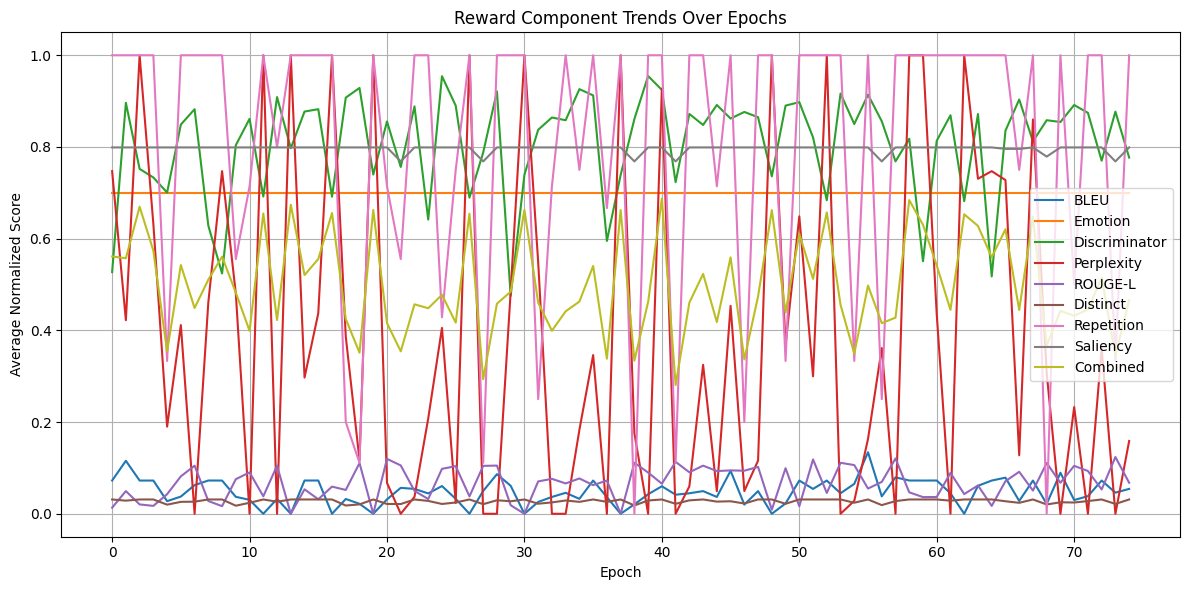

🧪 Distinct-1: 0.6063 | Distinct-2: 0.9928
📝 Sample #1: <start> you're truth anxiety
📝 Sample #2: <start> the is to confirm
📝 Sample #3: <start> attacked. answer fend as sees scum exact strange damn mouth that will grandpaernts everything i'm
🎮 Epoch 075 | G_Loss: 1.9260 | D_Loss: 1.9040 | D_Acc: 0.9201 | Reward: 0.4658
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0521 | Combined Reward Mean: 0.4266
🧪 Distinct-1: 0.5783 | Distinct-2: 0.9789
🎮 Epoch 076 | G_Loss: 2.5313 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.4266
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0844 | Combined Reward Mean: 0.4123
🧪 Distinct-1: 0.6026 | Distinct-2: 0.9798
🎮 Epoch 077 | G_Loss: 2.0734 | D_Loss: 0.0000 | D_Acc: 0.0000 | Reward: 0.4123
log_probs shape: (32, 26)
rewards_combined shape: (32,)
🎯 RL Reward Summary | BLEU: 0.0266 | Combined Reward Mean: 0.4322
🧪 Distinct-1: 0.6087 | Distinct-2: 0.9742
🎮 Epoch 078 | G_Loss: 2.3709 

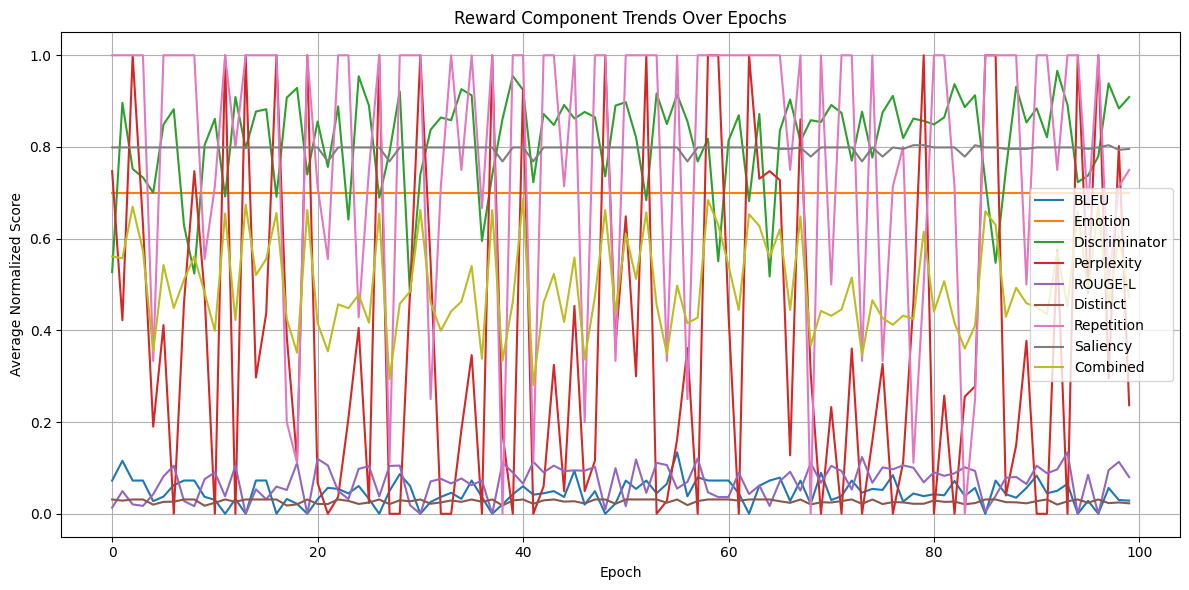

🧪 Distinct-1: 0.5607 | Distinct-2: 0.9608
📝 Sample #1: <start> fish gosh <start> <end> <end> cfa
📝 Sample #2: <start> normally save "only" certainly someone yaaass
📝 Sample #3: <start> double i mean protect i from feel mind horrible
🎮 Epoch 100 | G_Loss: 2.3260 | D_Loss: 1.9001 | D_Acc: 0.9202 | Reward: 0.4721
💾 Checkpoint saved at epoch 100!


<ipython-input-127-9a80086d4783>:1051: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-127-9a80086d4783>:1051: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-127-9a80086d4783>:1051: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

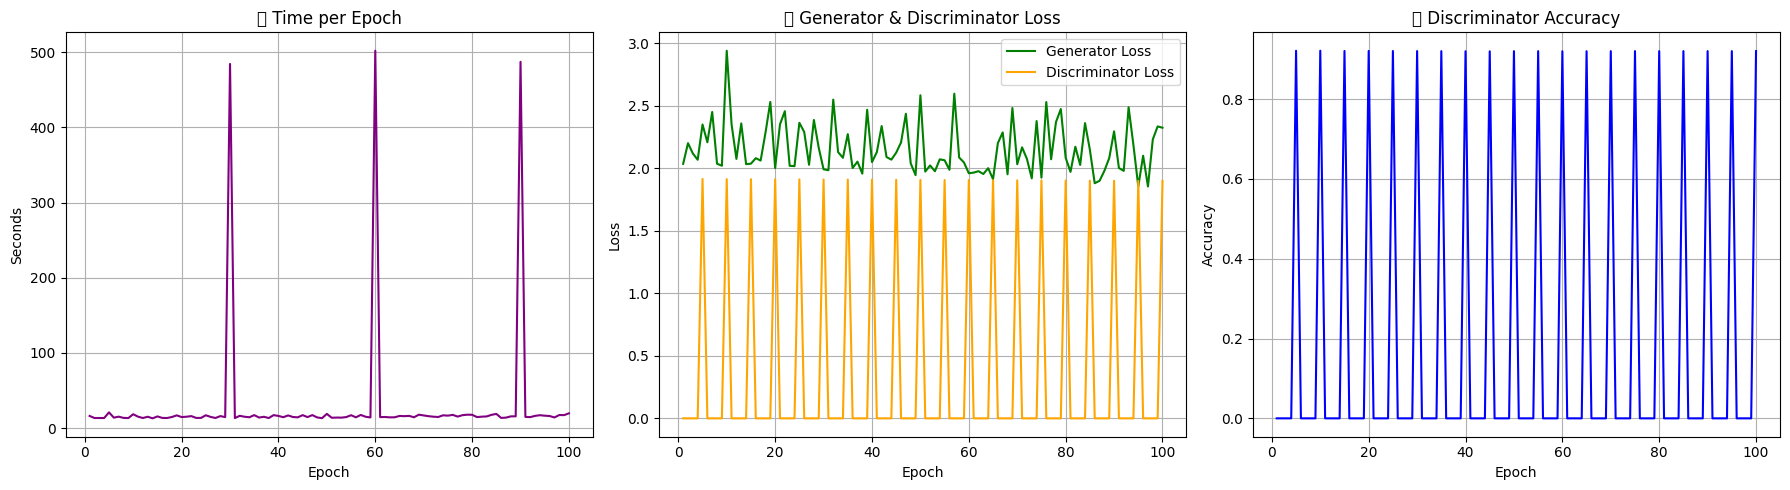

<ipython-input-127-9a80086d4783>:1063: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


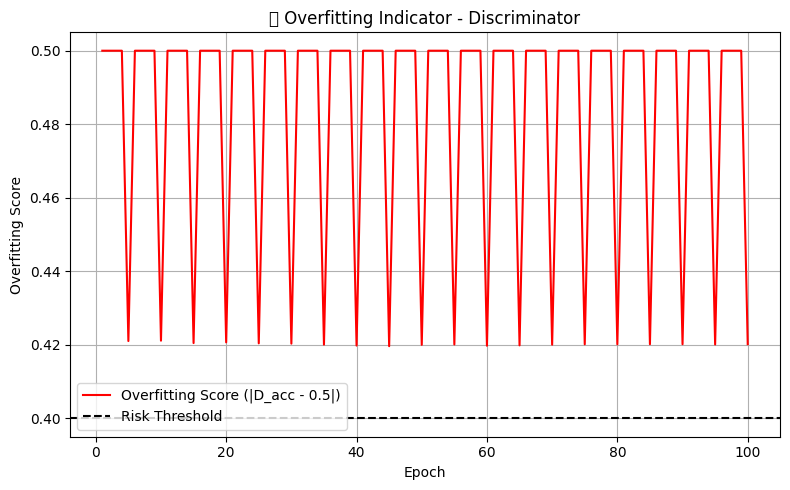

<ipython-input-127-9a80086d4783>:1075: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


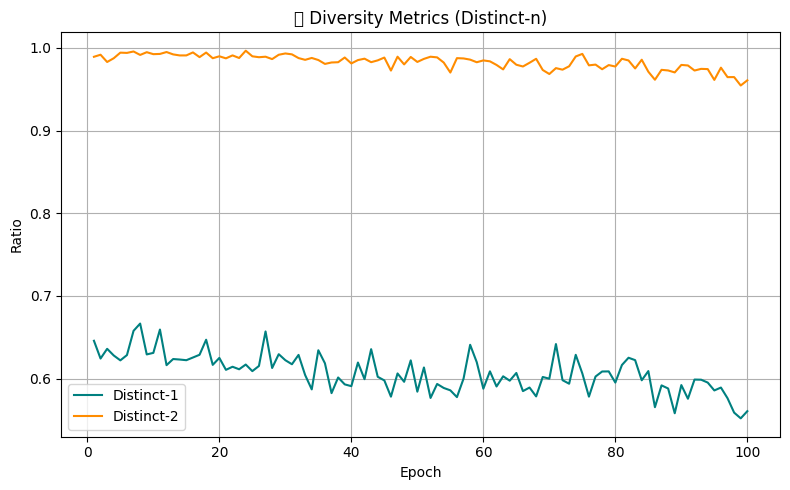

<ipython-input-127-9a80086d4783>:1085: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


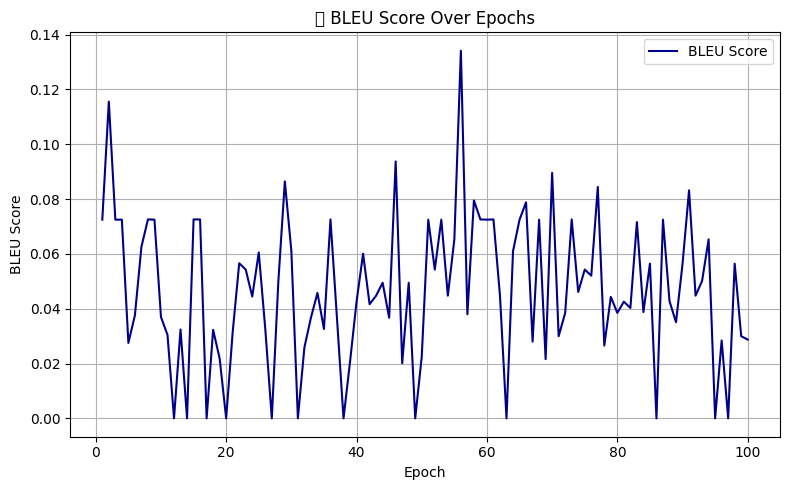

📁 Training metrics exported to 'training_stats.csv'


In [ ]:

# === Step 1: Hyperparameters ===
vocab_size = len(word_to_index) + 1
embedding_dim = 300
max_length = 26
batch_size = 32
num_epochs = 100
noise_dim = 64
REAL_LABEL = 0.95
FAKE_LABEL = 0.05
alpha = 0.05   # BLEU
beta = 0.1    # Emotion
gamma = 0.20 # Discriminator
delta = 0.25   # Perplexity
theta = 0.05  # ROUGE-L
epsilon = 0.15 # Distinct-1/2
zeta = 0.15    # Repetition Penalty
eta = 0.05    #Saliency
# Load GPT-2 model (once)
pp_tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
pp_model = GPT2LMHeadModel.from_pretrained("gpt2-large")
pp_model.eval()

def generate_single_sentence(generator, max_length, word_to_index, index_to_word):
    start_token = word_to_index.get('<start>', 1)
    pad_token = word_to_index.get('<pad>', 0)

    generated = [start_token] + [pad_token] * (max_length - 1)
    for t in range(1, max_length):
        preds = generator.predict(np.array([generated]), verbose=0)
        probs = preds[0][t - 1]
        probs = np.nan_to_num(probs, nan=0.0)
        probs = np.maximum(probs, 1e-8)
        probs /= np.sum(probs)
        next_token = np.random.choice(len(probs), p=probs)
        generated[t] = next_token
        if index_to_word.get(next_token) == '<end>':
            break

    # Convert tokens to words
    words = [index_to_word.get(idx, '?') for idx in generated if idx != pad_token]
    return ' '.join(words)
def compute_perplexity(text):
    """
    Calculate the perplexity of a sentence using distilGPT2.
    Lower = more fluent.
    """
    inputs = pp_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = pp_model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss
    return torch.exp(loss).item()

def generate_samples_efficient(generator, num_samples, max_length):
    start_token = word_to_index.get('<start>', 1)
    pad_token = word_to_index.get('<pad>', 0)
    samples = np.full((num_samples, max_length), pad_token)
    samples[:, 0] = start_token
    for t in range(1, max_length):
        preds = generator.predict(samples, verbose=0)
        for i in range(num_samples):
            probs = preds[i][t - 1]
            probs = np.nan_to_num(probs, nan=0.0)
            probs = np.maximum(probs, 1e-8)
            probs /= np.sum(probs)
            token = np.random.choice(len(probs), p=probs)
            samples[i, t] = token
    return samples

# === Step 2 Pretraining Data Preparation ===
def create_generator_training_data(index_sequences, max_length):
    X, y = [], []
    for seq in index_sequences:
        if len(seq) < 2: continue
        input_seq = seq[:-1]
        target_seq = seq[1:]
        X.append(input_seq)
        y.append(target_seq)
    X = pad_sequences(X, maxlen=max_length, padding='post')
    y = pad_sequences(y, maxlen=max_length, padding='post')
    return np.array(X), np.array(y)


def one_hot_targets(y, vocab_size):
    return np.array([to_categorical(seq, num_classes=vocab_size) for seq in y])
# def one_hot_targets(y, vocab_size):
#     y_oh = np.zeros((len(y), max_length, vocab_size), dtype=np.float32)
#     for i, seq in enumerate(y):
#         for t, token in enumerate(seq):
#             if t < max_length:
#                 y_oh[i, t, token] = 1.0
#     return y_oh

X_gen, y_gen = create_generator_training_data(data['text_as_indexes'].tolist(), max_length)
y_gen_oh = one_hot_targets(y_gen, vocab_size)


# === Step 3 Build LSTM Generator ===
def build_generator(vocab_size, embedding_dim, max_length, embedding_matrix, use_dropout=True, dropout_rate=0.2):
    inputs = Input(shape=(max_length,), name="input_tokens")

    # Embedding layer (frozen)
    x = Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  trainable=False,
                  name="embedding")(inputs)

    if use_dropout:
        x = Dropout(dropout_rate, name="embedding_dropout")(x)

    # First LSTM Encoder
    encoder_outputs = LSTM(256, return_sequences=True, name="encoder_lstm")(x)

    if use_dropout:
        encoder_outputs = Dropout(dropout_rate, name="encoder_dropout")(encoder_outputs)

    # Second LSTM Decoder
    decoder_outputs = LSTM(256, return_sequences=True, name="decoder_lstm")(encoder_outputs)

    if use_dropout:
        decoder_outputs = Dropout(dropout_rate, name="decoder_dropout")(decoder_outputs)

    # Attention layer (Bahdanau-style)
    context = AdditiveAttention(name="bahdanau_attention")([decoder_outputs, encoder_outputs])

    # Optional: Normalize context
    context = LayerNormalization(name="context_norm")(context)

    # Concatenate context with decoder outputs
    combined = Concatenate(axis=-1, name="concat_attention")([context, decoder_outputs])

    # Optional: Dense + normalization before projection
    x_proj = Dense(256, activation='relu', name="pre_output_dense")(combined)
    x_proj = LayerNormalization(name="pre_output_norm")(x_proj)

    # Project to vocabulary
    outputs = TimeDistributed(Dense(vocab_size, activation='softmax'), name="output_projection")(x_proj)

    # Build and return model
    model = Model(inputs=inputs, outputs=outputs, name="Generator")
    return model

# === Step 3: Build Transformer Generator ===
# def build_transformer_generator(vocab_size, embedding_dim, max_length, embedding_matrix=None):
#     inputs = Input(shape=(max_length,), name="input_tokens")

#     # Embedding layer (optional: with pretrained weights)
#     if embedding_matrix is not None:
#         embed = Embedding(input_dim=vocab_size,
#                           output_dim=embedding_dim,
#                           weights=[embedding_matrix],
#                           trainable=False,
#                           name="embedding")(inputs)
#     else:
#         embed = Embedding(input_dim=vocab_size,
#                           output_dim=embedding_dim,
#                           name="embedding")(inputs)

#     # Positional Encoding
#     positions = tf.range(start=0, limit=max_length, delta=1)
#     pos_embed = Embedding(input_dim=max_length, output_dim=embedding_dim, name="pos_embedding")(positions)
#     x = embed + pos_embed  # shape: (batch_size, max_length, embedding_dim)

#     # === Transformer Block (1 layer) ===
#     attn_output = MultiHeadAttention(num_heads=4, key_dim=embedding_dim, name="mha")(x, x)
#     x = Add(name="skip_attn")([x, attn_output])
#     x = LayerNormalization()(x)

#     ffn = Dense(embedding_dim * 4, activation='relu')(x)
#     ffn = Dense(embedding_dim)(ffn)
#     x = Add(name="skip_ffn")([x, ffn])
#     x = LayerNormalization()(x)

#     # === Output projection ===
#     outputs = TimeDistributed(Dense(vocab_size, activation='softmax'), name="output_projection")(x)

#     model = Model(inputs=inputs, outputs=outputs, name="TransformerGenerator")
#     return model

generator = build_generator(vocab_size, embedding_dim, max_length, embedding_matrix,use_dropout=True, dropout_rate=0.2)
gen_optimizer = Adam(learning_rate=5e-5, clipvalue=0.5)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
generator.compile(optimizer=gen_optimizer, loss='categorical_crossentropy')


# === Step 4 Generator Pretraining ===
early_stop_gen = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)
print("🔥 Pretraining Generator...")

generator.fit(X_gen, y_gen_oh, batch_size=32, epochs=10, verbose=1, callbacks=[early_stop_gen])
sentence = generate_single_sentence(generator, max_length, word_to_index, index_to_word)
print("📝 Generated sentence:", sentence)
# === Step 4: Pretraining transformer Generator ===
# generator = build_transformer_generator(vocab_size, embedding_dim, max_length, embedding_matrix)
# gen_optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)

# generator.compile(optimizer=gen_optimizer, loss='categorical_crossentropy')

# early_stop_gen = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

# print("🔥 Pretraining Transformer Generator...")
# generator.fit(X_gen, y_gen_oh, batch_size=32, epochs=30, verbose=1, callbacks=[early_stop_gen])

# === Step 5 Build Dual-Head Discriminator ===
def build_dual_discriminator(vocab_size, embedding_dim, max_length, embedding_matrix, l2_strength=0.001):
    input_seq = Input(shape=(max_length,), name='input_tokens')

    # Embedding layer (frozen)
    x = Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  trainable=False,
                  name="embedding")(input_seq)

    # === BiLSTM ===
    x_bilstm = Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2), name="bilstm_output")(x)

    # === Additive Attention ===
    attn_context = AdditiveAttention(name="bahdanau_attention")([x_bilstm, x_bilstm])
    attn_pooled = GlobalAveragePooling1D(name="attn_pooling")(attn_context)

    # === MultiHead Attention (optional) ===
    mha_output = MultiHeadAttention(num_heads=2, key_dim=128, name="multihead_attention")(x_bilstm, x_bilstm)
    mha_pooled = GlobalAveragePooling1D(name="mha_pooling")(mha_output)

    # === TextCNN (n-gram feature extraction) ===
    conv = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', name="conv1d_cnn")(x_bilstm)
    cnn_pooled = GlobalMaxPooling1D(name="cnn_pooling")(conv)

    # === Combine Features ===
    combined = Concatenate(name="combined_context")([attn_pooled, mha_pooled, cnn_pooled])  # shape: (512,)

    # === Dense Layers with Residual Connection ===
    x = LayerNormalization(name="layernorm_input")(combined)
    x_dense = Dense(x.shape[-1], activation='relu', kernel_regularizer=l2(l2_strength), name="dense_1")(x)
    x_dense = Dropout(0.2, name="dropout_1")(x_dense)
    x = Add(name="skip_connection")([x, x_dense])  # ✅ Residual connection with same shape

    x = LayerNormalization(name="layernorm_2")(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_strength), name="dense_2")(x)
    x = Dropout(0.2, name="dropout_2")(x)

    # === Output Heads ===
    real_fake_output = Dense(1, activation='sigmoid', name='real_fake_output')(x)
    emotion_output = Dense(1, activation='sigmoid', name='emotion_output')(x)

    model = Model(inputs=input_seq, outputs=[real_fake_output, emotion_output], name="AdvancedDualDiscriminator")
    return model


disc_model = build_dual_discriminator(vocab_size, embedding_dim, max_length, embedding_matrix)
smooth_loss = BinaryCrossentropy(label_smoothing=0.4)

# disc_model.compile(
#     optimizer=Adam(1e-4, clipnorm=1.0),
#     loss={'real_fake_output': smooth_loss, 'emotion_output': smooth_loss},
#     loss_weights={'real_fake_output': 1.0, 'emotion_output': 0.5},
#     metrics={'real_fake_output': 'accuracy', 'emotion_output': 'accuracy'}
# )
# === 🔁 Boost Training for Dual Discriminator ===
print("🔥 Boost training for dual discriminator before RL...")

n_samples = min(1000, len(data))
real_samples = data['text_as_indexes'].sample(n=n_samples, random_state=42).tolist()
real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')

# All real texts are from 'fear' category → emotion = 1
y_real = np.ones((len(real_samples), 1))
y_emotion_real = np.ones((len(real_samples), 1))

# Generate fake samples from generator
fake_samples = generate_samples_efficient(generator, num_samples=n_samples, max_length=max_length)
y_fake = np.zeros((len(fake_samples), 1))
y_emotion_fake = np.zeros((len(fake_samples), 1))

# Combine real + fake samples
X = np.concatenate([real_samples, fake_samples], axis=0)
y_real_combined = np.concatenate([y_real, y_fake], axis=0)
y_emotion_combined = np.concatenate([y_emotion_real, y_emotion_fake], axis=0)

# Shuffle before training
X, y_real_combined, y_emotion_combined = shuffle(X, y_real_combined, y_emotion_combined)

# Split into train/validation
X_train, X_val, y_real_train, y_real_val, y_emo_train, y_emo_val = train_test_split(
    X, y_real_combined, y_emotion_combined, test_size=0.2, random_state=42)

# 🧠 Compile with label smoothing
smooth_loss = BinaryCrossentropy(label_smoothing=0.2)
disc_model.compile(
    optimizer=Adam(1e-5, clipvalue=1.0),
    loss={'real_fake_output': smooth_loss, 'emotion_output': smooth_loss},
    loss_weights={'real_fake_output': 1.0, 'emotion_output': 1.2},
    metrics={'real_fake_output': 'accuracy', 'emotion_output': 'accuracy'}
)

# 🚀 Train
history = disc_model.fit(
    X_train,
    {'real_fake_output': y_real_train, 'emotion_output': y_emo_train},
    validation_data=(X_val, {'real_fake_output': y_real_val, 'emotion_output': y_emo_val}),
    batch_size=32,
    epochs=20,
    verbose=1
)

# 📊 Plot accuracy
plt.plot(history.history['real_fake_output_accuracy'], label='Real/Fake Accuracy (Train)')
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Accuracy (Train)')
plt.plot(history.history['val_real_fake_output_accuracy'], label='Real/Fake Accuracy (Val)')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Accuracy (Val)')
plt.title('🧠 Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 📉 Plot loss
plt.plot(history.history['real_fake_output_loss'], label='Real/Fake Loss (Train)')
plt.plot(history.history['emotion_output_loss'], label='Emotion Loss (Train)')
plt.plot(history.history['val_real_fake_output_loss'], label='Real/Fake Loss (Val)')
plt.plot(history.history['val_emotion_output_loss'], label='Emotion Loss (Val)')
plt.title('📉 Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
losses_log = []

print("🔁 Fine-Tuning Discriminator (Batch-level)...")
def train_discriminator_batch(
    disc_model, generator, data, max_length, batch_size=512,
    epochs=1, smooth_real=(0.80, 1.0), smooth_fake=(0.0, 0.2),
    flip_prob=0.05, add_noise=True,use_flip=True, use_noise=True
):
    print("🔁 Fine-Tuning Discriminator (Batch-level)...")

    for epoch in range(epochs):
        # Sample real
        real_samples = data['text_as_indexes'].sample(n=batch_size, replace=True).tolist()
        real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')

        # Generate fake
        fake_samples = generate_samples_efficient(generator, batch_size, max_length)

        # Smooth labels
        y_real = np.random.uniform(*smooth_real, size=(len(real_samples), 1))
        y_fake = np.random.uniform(*smooth_fake, size=(len(fake_samples), 1))
        y_emotion_real = np.ones((len(real_samples), 1))
        y_emotion_fake = np.zeros((len(fake_samples), 1))

        # Optional: Label flipping
        flip_real = np.random.rand(len(real_samples)) < flip_prob
        flip_fake = np.random.rand(len(fake_samples)) < flip_prob
        y_real[flip_real] = np.random.uniform(*smooth_fake)
        y_fake[flip_fake] = np.random.uniform(*smooth_real)

        # Optional: Noise injection
        if add_noise:
            y_real += np.random.normal(0, 0.05, size=y_real.shape)
            y_fake += np.random.normal(0, 0.05, size=y_fake.shape)
            y_real = np.clip(y_real, 0, 1)
            y_fake = np.clip(y_fake, 0, 1)
        if use_flip:
            flip_real = np.random.rand(len(real_samples)) < flip_prob
            flip_fake = np.random.rand(len(fake_samples)) < flip_prob
            y_real[flip_real] = np.random.uniform(*smooth_fake)
            y_fake[flip_fake] = np.random.uniform(*smooth_real)

        if use_noise:
            y_real += np.random.normal(0, 0.05, size=y_real.shape)
            y_fake += np.random.normal(0, 0.05, size=y_fake.shape)
            y_real = np.clip(y_real, 0, 1)
            y_fake = np.clip(y_fake, 0, 1)
        # Merge and shuffle
        X = np.concatenate([real_samples, fake_samples], axis=0)
        y_real_combined = np.concatenate([y_real, y_fake], axis=0)
        y_emotion_combined = np.concatenate([y_emotion_real, y_emotion_fake], axis=0)
        X, y_real_combined, y_emotion_combined = shuffle(X, y_real_combined, y_emotion_combined)

        # Train
        d_loss = disc_model.train_on_batch(
            X, {
                'real_fake_output': y_real_combined,
                'emotion_output': y_emotion_combined
            }
        )

        # Print result
        loss_str = " | ".join([f"{l:.4f}" for l in d_loss]) if isinstance(d_loss, list) else f"{d_loss:.4f}"
        losses_log.append({
    "epoch": epoch + 1,
    "d_real_fake_loss": d_loss[1],
    "d_emotion_loss": d_loss[2],
    "real_fake_acc": d_loss[3],
    "emotion_acc": d_loss[4],
    "total_loss": d_loss[0]
})

train_discriminator_batch(
    disc_model=disc_model,
    generator=generator,
    data=data,
    max_length=max_length,
    epochs=10,
    flip_prob=0.05,
    add_noise=True
)
losses_log_df = pd.DataFrame(losses_log)
print("📊 Losses Log:")
print(losses_log_df.to_string(index=False))
plt.figure(figsize=(12, 6))
plt.plot(losses_log_df["epoch"], losses_log_df["d_real_fake_loss"], label="Real/Fake Loss")
plt.plot(losses_log_df["epoch"], losses_log_df["d_emotion_loss"], label="Emotion Loss")
plt.plot(losses_log_df["epoch"], losses_log_df["total_loss"], label="Total Loss", linestyle='--')
plt.title("📉 Batch-Level Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#=== Step 6 Sampling Utilities ===


def top_k_sampling(logits, k=10):
    top_k_indices = np.argpartition(logits, -k)[-k:]
    top_k_logits = logits[top_k_indices]
    top_k_probs = np.exp(top_k_logits) / np.sum(np.exp(top_k_logits))
    return np.random.choice(top_k_indices, p=top_k_probs)

def rollout_generator_batch(generator, partial_seq, n_rollouts=8, max_length=max_length, temperature=1.0):
    pad_token = word_to_index.get('<pad>', 0)
    end_token = word_to_index.get('<end>', 2)
    sequences = [partial_seq.copy() for _ in range(n_rollouts)]
    completed = [False] * n_rollouts
    for t in range(len(partial_seq), max_length):
        padded_batch = pad_sequences(sequences, maxlen=max_length, padding='post', value=pad_token)
        preds = generator.predict(padded_batch, verbose=0)
        for i in range(n_rollouts):
            if completed[i]:
                continue
            logits = preds[i][t]
            scaled_logits = logits / temperature
            token_probs = np.exp(scaled_logits) / np.sum(np.exp(scaled_logits))
            token_probs = np.clip(token_probs, 1e-10, 1.0)
            token_probs /= np.sum(token_probs)
            next_token = top_k_sampling(scaled_logits, k=10)
            sequences[i].append(next_token)
            if next_token == end_token:
                completed[i] = True
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', value=pad_token)
    return padded_sequences.tolist()

# === Step 7 Reward Functions ===

#BLEU
def compute_bleu(candidate, references):
    tokenizer = lambda s: s.split()
    candidate_tokens = tokenizer(candidate)
    references_tokens = [tokenizer(ref) for ref in references]
    smoothie = SmoothingFunction().method4
    return sentence_bleu(references_tokens, candidate_tokens, smoothing_function=smoothie)

def compute_self_bleu(texts):
    tokenizer = lambda s: s.split()
    smoothie = SmoothingFunction().method4
    scores = []

    for i in range(len(texts)):
        candidate = texts[i]
        references = texts[:i] + texts[i+1:]
        candidate_tokens = tokenizer(candidate)
        references_tokens = [tokenizer(ref) for ref in references]
        bleu_score = sentence_bleu(references_tokens, candidate_tokens, smoothing_function=smoothie)
        scores.append(bleu_score)

    return sum(scores) / len(scores) if scores else 0.0

#Rouge
def compute_rouge(candidate, references):
    """
    Compute ROUGE score between candidate and references.
    The ROUGE score is used to measure the overlap between generated text and reference text.
    """
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    scores = []

    for ref in references:
        score = scorer.score(ref, candidate)
        scores.append(score)

    # Aggregate the scores (mean of each ROUGE type)
    avg_scores = {key: sum([score[key].fmeasure for score in scores]) / len(scores) for key in scores[0].keys()}

    return avg_scores

#Repetition Penalty
def compute_repetition_penalty(text, repeat_threshold=3, max_penalty_ratio=0.5):
    words = text.strip().split()
    if not words:
        return 0.0

    counts = Counter(words)
    repeated = [word for word, count in counts.items() if count >= repeat_threshold]
    penalty_ratio = len(repeated) / len(counts)
    reward = 1.0 - normalize(penalty_ratio, min_val=0.0, max_val=max_penalty_ratio)
    return reward

#distinct
def compute_distinct_metrics(samples):
    unigrams, bigrams = set(), set()
    total_unigrams, total_bigrams = 0, 0
    pad_idx = word_to_index.get('<pad>', -1)
    for sample in samples:
        tokens = [t for t in sample if t != pad_idx]
        unigrams.update(tokens)
        bigrams.update(zip(tokens, tokens[1:]))
        total_unigrams += len(tokens)
        total_bigrams += max(0, len(tokens) - 1)
    d1 = len(unigrams) / total_unigrams if total_unigrams > 0 else 0
    d2 = len(bigrams) / total_bigrams if total_bigrams > 0 else 0
    return d1, d2


#Saliency
# Define stopwords, excluding important negation words
stop_words = set(stopwords.words("english"))
negation_words = {"not", "no", "never", "nothing", "nobody"}
stop_words -= negation_words

# Define weights for POS tags (adjectives, adverbs, verbs, nouns)
POS_WEIGHTS = {
    "JJ": 1.3,  # Adjective
    "RB": 1.2,  # Adverb
    "VB": 1.1,  # Verb
    "NN": 1.0   # Noun
}

# Basic text cleaning and stopword removal
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return [w for w in text.split() if w not in stop_words]


def squash(x):
    return 1 / (1 + exp(-x))

# Saliency score based on POS, position, and negation
def compute_saliency_score(text, debug=False):
    words = clean_and_tokenize(text)
    if not words:
        return 0.0

    tagged_words = pos_tag(words)
    total_score = 0.0

    for idx, (word, tag) in enumerate(tagged_words):
        pos_prefix = tag[:2]
        pos_weight = POS_WEIGHTS.get(pos_prefix, 0.5)

        # Penalize stopwords more clearly
        if word.lower() in stopwords.words("english"):
            pos_weight *= 0.3

        position_weight = 1.2 if idx < 2 or idx >= len(words) - 2 else 1.0
        is_negated = idx > 0 and words[idx - 1].lower() in negation_words
        polarity = -1 if is_negated else 1

        token_score = pos_weight * position_weight * polarity
        total_score += token_score

    norm_score = total_score / len(words)
    final_score = round(1 / (1 + np.exp(-norm_score)), 4)

    if debug:
        print(f"🧠 Text: {text}")
        print(f"🔎 POS Tags: {[tag for _, tag in tagged_words]}")
        print(f"🔥 Score (raw): {total_score:.4f} | Norm: {norm_score:.4f} | Final: {final_score}")

    return final_score



#emotion score


# Stopwords minus negations
negation_words = {
    "no", "not", "never", "none", "nobody", "nothing", "neither", "nowhere", "nor",
    "can't", "cannot", "won't", "don't", "doesn't", "didn't", "isn't", "aren't",
    "wasn't", "weren't", "wouldn't", "shouldn't", "couldn't", "haven't", "hasn't", "hadn't"
}
stop_words = set(stopwords.words("english")) - negation_words

# Example generic/common words
generic_words = {"thing", "something", "someone", "everything", "anything", "going", "really", "just", "well", "get"}

def analyze_emotion_score(text, lexicon_words=None, word_vectors=None,
                          threshold=0.3, lexicon_weight=1.0, similar_weight=0.7,
                          penalty_factor=0.5, max_penalty=0.3, verbose=True):

    if lexicon_words is None or word_vectors is None:
        raise ValueError("Lexicon and word vectors must be provided.")

    # Tokenize and filter
    raw_words = re.findall(r'\b\w+\b', text.lower())
    words = [w for w in raw_words if w not in stop_words]
    if not words:
        return 0.0

    # Precompute lexicon vectors
    lexicon_vecs = [word_vectors[w] for w in lexicon_words if w in word_vectors]
    if not lexicon_vecs:
        return 0.0

    total_score = 0.0
    weight_sum = 0.0

    contributing_words = []

    for i, word in enumerate(words):
        position_weight = 1.0 - (i / len(words))  # earlier words weigh more
        word_score = 0.0
        reason = ""

        if word in lexicon_words:
            word_score = lexicon_weight
            reason = "lexicon"
        elif word in word_vectors:
            similarities = cosine_similarity([word_vectors[word]], lexicon_vecs)[0]
            max_sim = max(similarities)
            if max_sim >= threshold:
                word_score = similar_weight
                reason = f"similar ({round(max_sim, 2)})"

        # Apply soft penalty for generic words
        if word in generic_words and word_score > 0:
            word_score = min(word_score * penalty_factor, max_penalty)
            reason += " (penalized)"

        if word_score > 0:
            total_score += word_score * position_weight
            weight_sum += position_weight
            contributing_words.append((word, reason))

    # # Verbose logging
    # if verbose:
    #     # print("Words contributing to emotion score:")
    #     for word, why in contributing_words:
    #     #     print(f"  - {word} ({why})")
    #     # print(f"Total contributing words: {len(contributing_words)} / {len(words)}")

    return round(total_score / weight_sum, 4) if weight_sum > 0 else 0.0






def analyze_generated_text(text):
    tokens = [word_to_index.get(tok, word_to_index['<oov>']) for tok in text.split()]
    padded = pad_sequences([tokens], maxlen=max_length, padding='post')
    real_prob, emotion_prob = disc_model.predict(padded, verbose=0)
    print(f"Real/Fake Score: {real_prob[0][0]:.4f} | Emotion Score: {emotion_prob[0][0]:.4f}")


def get_per_token_rewards(generator, discriminator, partial_seq, n_rollouts=32, max_length=max_length, temperature=1.0):
    rewards = []
    for t in range(1, len(partial_seq) + 1):
        sub_seq = partial_seq[:t]
        rollouts = rollout_generator_batch(generator, sub_seq, n_rollouts=n_rollouts, max_length=max_length, temperature=temperature)
        if rollouts is None: continue
        token_rewards = [disc_model.predict(np.array([r]), verbose=0)[0][0] for r in rollouts]
        rewards.append(np.mean(token_rewards))
    return rewards

def compute_reward_to_go(rewards):
    rtg = []
    cumulative = 0
    for r in reversed(rewards):
        cumulative = r + cumulative
        rtg.insert(0, cumulative)
    return rtg

def subtract_baseline(rewards):
    baseline = np.mean(rewards)
    return [r - baseline for r in rewards]



 # === Normalize ===
def normalize(value, min_val, max_val):
    """
    Normalizes a value to the range [0, 1].
    If value is outside the range, it's clipped.
    """
    if max_val == min_val:
        return 0.0  # Avoid division by zero
    normalized = (value - min_val) / (max_val - min_val)
    return np.clip(normalized, 0.0, 1.0)



def analyze_rewards_by_temperature(generator, discriminator, partial_seq, temperatures=[0.3,0.7,0.9 ,1.0, 1.3], n_rollouts=32, max_length=max_length):
    print("🧪 Reward Comparison Across Temperatures")
    print("-" * 60)

    best_temp = None
    best_avg_reward = -float('inf')

    for temp in temperatures:
        rewards = get_per_token_rewards(generator, discriminator, partial_seq, n_rollouts=n_rollouts, max_length=max_length, temperature=temp)
        rtg = compute_reward_to_go(rewards)
        avg_reward = np.mean(rewards)

        print(f"🌡️ Temperature: {temp:.2f} | Avg Reward: {avg_reward:.4f}")
        for i, (r, r2g) in enumerate(zip(rewards, rtg)):
            print(f"  Token {i+1:02d} | Reward: {r:.4f} | RTG: {r2g:.4f}")
        print("-" * 60)

        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
            best_temp = temp

    print(f"🏆 Best Temperature: {best_temp:.2f} with Avg Reward: {best_avg_reward:.4f}")
    return best_temp

reward_components_over_epochs = {
    "BLEU": [],
    "Emotion": [],
    "Discriminator": [],
    "Perplexity": [],
    "ROUGE-L": [],
    "Distinct": [],
    "Repetition": [],
    "Saliency": [],"Combined": []
}
current_temperature = 0.8
def compute_rewards_combined(samples):
    pad_token = word_to_index.get('<pad>', 0)

    # Decode samples
    decoded = [" ".join([index_to_word.get(tok, '') for tok in seq if tok != pad_token]) for seq in samples]

    # Real references
    real_texts = data['text'].sample(n=batch_size).tolist()

    # === Compute rewards ===
    bleu_rewards = np.array([compute_bleu(gen, real_texts) for gen in decoded])
    emotion_rewards = np.array([analyze_emotion_score(gen, lexicon_words=lexicon, word_vectors=word_vectors) for gen in decoded])
    saliency_rewards = np.array([compute_saliency_score(gen) for gen in decoded])
    disc_preds, _ = disc_model.predict(samples, verbose=0)
    disc_rewards = disc_preds.flatten()
    perplexity_raw = np.array([compute_perplexity(gen) for gen in decoded])
    perplexity_log = np.nan_to_num(np.log(np.clip(perplexity_raw, 1e-8, None)))
    rouge_l_scores = np.array([ compute_rouge(gen, [ref])["rougeL"] for gen, ref in zip(decoded, real_texts)])
    repetition_rewards = np.array([compute_repetition_penalty(gen) for gen in decoded])
    repetition_r = normalize(repetition_rewards, min_val=0.0, max_val=1.0)
    # perplexity_rewards = -perplexity_raw
    d1, d2 = compute_distinct_metrics(samples)
    distinct_reward = (d1 + d2) / 2
    distinct_rewards = np.full((batch_size,), distinct_reward)


    bleu_r = normalize(bleu_rewards, min_val=0.0, max_val=1.0)
    emo_r = normalize(emotion_rewards, min_val=0.0, max_val=1.0)
    disc_r = normalize(disc_rewards, min_val=0.0, max_val=1.0)
    perp_r = 1 - normalize(perplexity_log, min_val=np.log(30), max_val=np.log(100))
    dist_r = normalize(distinct_rewards, min_val=0.0, max_val=1.0)
    rouge_r = normalize(rouge_l_scores, min_val=0.0, max_val=1.0)
    saliency_r = normalize(saliency_rewards, min_val=0.0, max_val=1.0)
    reward_components_over_epochs["BLEU"].append(np.mean(bleu_r))
    reward_components_over_epochs["Emotion"].append(np.mean(emo_r))
    reward_components_over_epochs["Discriminator"].append(np.mean(disc_r))
    reward_components_over_epochs["Perplexity"].append(np.mean(perp_r))
    reward_components_over_epochs["ROUGE-L"].append(np.mean(rouge_r))
    reward_components_over_epochs["Distinct"].append(np.mean(dist_r))
    reward_components_over_epochs["Repetition"].append(np.mean(repetition_r))
    reward_components_over_epochs["Saliency"].append(np.mean(saliency_r))
    # === Combine ===
    combined = (
        alpha * bleu_r +
        beta * emo_r +
        gamma * disc_r +
        delta * perp_r +
        theta * rouge_r+
        epsilon * dist_r +
        zeta * repetition_r + eta * saliency_r
    )
    reward_components_over_epochs["Combined"].append(np.mean(combined))

    return combined, bleu_rewards.mean()


# === Step 8 RL Training Step ===
def rl_train_step_tf(generator, discriminator, optimizer, samples, rewards_combined):
    # Convert to tensor with correct dtype
    rewards_combined = tf.convert_to_tensor(rewards_combined, dtype=tf.float32)
    if rewards_combined.shape == (max_length,):
        rewards_combined = tf.tile(tf.expand_dims(rewards_combined, 0), [batch_size, 1])
    with tf.GradientTape() as tape:
        preds = generator(samples, training=True)  # [batch_size, max_length, vocab_size]

        # === Calculate log probabilities ===
        one_hot_samples = tf.one_hot(samples, vocab_size)
        log_probs = tf.math.log(tf.reduce_sum(preds * one_hot_samples, axis=-1) + 1e-10)  # [batch_size, max_length]
        print("log_probs shape:", log_probs.shape)
        print("rewards_combined shape:", rewards_combined.shape)
        # === Match rewards shape ===
        if rewards_combined.shape.rank == 1:  # [batch_size]
            rewards_combined = tf.expand_dims(rewards_combined, axis=1)  # [batch_size, 1]
            rewards_combined = tf.repeat(rewards_combined, repeats=log_probs.shape[1], axis=1)  # [batch_size, max_length]
        elif rewards_combined.shape != log_probs.shape:
            raise ValueError(f"Shape mismatch: log_probs {log_probs.shape}, rewards {rewards_combined.shape}")

        # === RL Loss ===
        loss = -tf.reduce_mean(log_probs * rewards_combined)

    grads = tape.gradient(loss, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))

    return loss.numpy()

# print("🔥 Pretraining Dual-Head Discriminator (3 epochs)...")
# for epoch in range(5):
#     real_samples = data['text_as_indexes'].sample(n=512, replace=True).tolist()
#     real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')

#     fake_samples = generate_samples_efficient(generator, 512, max_length)

#     y_real = np.random.uniform(0.9, 1.0, size=(len(real_samples), 1))
#     y_fake = np.random.uniform(0.0, 0.1, size=(len(fake_samples), 1))
#     y_emotion_real = np.ones((len(real_samples), 1))
#     y_emotion_fake = np.zeros((len(fake_samples), 1))

#     X = np.concatenate([real_samples, fake_samples], axis=0)
#     y_real_combined = np.concatenate([y_real, y_fake], axis=0)
#     y_emotion_combined = np.concatenate([y_emotion_real, y_emotion_fake], axis=0)

#     X, y_real_combined, y_emotion_combined = shuffle(X, y_real_combined, y_emotion_combined)

#     d_loss = disc_model.train_on_batch(
#         X,
#         {
#             'real_fake_output': y_real_combined,
#             'emotion_output': y_emotion_combined
#         }
#     )

#     if isinstance(d_loss, list):
#         loss_str = " | ".join([f"{l:.4f}" for l in d_loss])
#     else:
#         loss_str = f"{d_loss:.4f}"

#     print(f"🧠 D Pretrain Epoch {epoch+1}/5 | Losses: {loss_str}")

def plot_reward_components(reward_components_over_epochs):
    plt.figure(figsize=(12, 6))
    for component, values in reward_components_over_epochs.items():
        plt.plot(values, label=component)

    plt.title("Reward Component Trends Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Average Normalized Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Step 9 Metric Tracking Lists ===
epoch_times = []
generator_losses = []
discriminator_losses = []
discriminator_accuracies = []
overfitting_scores = []
distinct_1_scores = []
distinct_2_scores = []
bleu_scores_over_epochs = []


# === Step 10 RL Training Loop ===
print("🚀 Starting SeqGAN Reinforcement Learning training...")

with tf.device('/GPU:0'):
    for epoch in range(1, num_epochs + 1):
        start_time = time.time()

        # === Step 1: MLE Pretraining ===
        # real_mle_samples = data['text_as_indexes'].sample(n=batch_size).tolist()
        # real_mle_samples = pad_sequences(real_mle_samples, maxlen=max_length, padding='post')
        # inputs = np.array(real_mle_samples)
        # targets = tf.keras.utils.to_categorical(inputs, num_classes=vocab_size)
        # mle_loss = generator.train_on_batch(inputs, targets)

        # === Step 2: Sample a rollout ===
        start_seq = [word_to_index.get("<start>", 1)]
        rollouts = rollout_generator_batch(generator, start_seq, n_rollouts=32, max_length=max_length, temperature=current_temperature)
        base_rollout = rollouts[0]


        samples = np.array([base_rollout] * batch_size)

        # === Step 3: Compute token-level rewards + RTG ===
        # rewards = get_per_token_rewards(generator, disc_model, base_rollout, n_rollouts=32, max_length=max_length, temperature=0.8)
        # rewards_rtg = compute_reward_to_go(rewards)
        # rewards_final = subtract_baseline(rewards_rtg)
        # rewards_final = np.array(rewards_final)
        # if np.std(rewards_final) > 0:
        #     rewards_final = (rewards_final - np.mean(rewards_final)) / (np.std(rewards_final) + 1e-8)
        # rewards_final = (rewards_final - np.min(rewards_final)) / (np.max(rewards_final) - np.min(rewards_final) + 1e-8)

        # # === Step 4: BLEU Reward ===
        # decoded_rollout = [" ".join([index_to_word.get(tok, '') for tok in base_rollout if tok != word_to_index['<pad>']])]
        # real_texts = data['text'].sample(n=batch_size).tolist()
        # bleu_score = compute_bleu(decoded_rollout[0], real_texts)
        # bleu_vector = np.full_like(rewards_final, bleu_score)

        # # === Step 5: Combine rewards and train generator ===
        # rewards_combined = 0.6 * rewards_final + 0.4 * bleu_vector
        rewards_combined, bleu_score = compute_rewards_combined(samples)
        rewards_combined = tf.convert_to_tensor(rewards_combined, dtype=tf.float32)
        # reward_mean = np.clip(np.mean(rewards_combined), 0.05, 0.95)
        # rewards_combined = tf.convert_to_tensor(rewards_combined, dtype=tf.float32)
        g_loss_rl = rl_train_step_tf(generator, disc_model, gen_optimizer, samples, rewards_combined)
        # g_loss = 0.6 * g_loss_rl + 0.4 * mle_loss
        reward_mean = tf.reduce_mean(rewards_combined).numpy()
        print(f"🎯 RL Reward Summary | BLEU: {bleu_score:.4f} | Combined Reward Mean: {reward_mean:.4f}")

        # print(f"🎯 RL Reward Summary | BLEU: {bleu_score:.4f} | Combined Reward Mean: {reward_mean:.4f}")
        # === Step 5: Mixed MLE + RL loss
        real_mle_samples = data['text_as_indexes'].sample(n=batch_size).tolist()
        real_mle_samples = pad_sequences(real_mle_samples, maxlen=max_length, padding='post')
        inputs = np.array(real_mle_samples)
        targets = tf.keras.utils.to_categorical(inputs, num_classes=vocab_size)
        mle_loss = generator.train_on_batch(inputs, targets)

        g_loss = 0.6 * g_loss_rl + 0.4 * mle_loss
        # === Step 6: Train Discriminator ===
        real_samples = data['text_as_indexes'].sample(n=batch_size).tolist()
        real_samples = pad_sequences(real_samples, maxlen=max_length, padding='post')
        fake_samples = generate_samples_efficient(generator, batch_size, max_length)

        if epoch % 5 == 0:
            real_labels = np.full((batch_size, 1), REAL_LABEL)
            fake_labels = np.full((batch_size, 1), FAKE_LABEL)
            y_real_combined = np.concatenate([real_labels, fake_labels], axis=0)

            y_emotion_real = np.ones((batch_size, 1))  # fear
            y_emotion_fake = np.zeros((batch_size, 1))  # fake
            y_emotion_combined = np.concatenate([y_emotion_real, y_emotion_fake], axis=0)

            X = np.concatenate([real_samples, fake_samples], axis=0)
            train_outputs = disc_model.train_on_batch(
                X,
                {
                    'real_fake_output': y_real_combined,
                    'emotion_output': y_emotion_combined
                }
            )
            d_loss_total = train_outputs[0]
            d_loss_real_fake = train_outputs[1]
            d_loss_emotion = train_outputs[2]
            d_acc = train_outputs[3]
            d_acc_emotion = train_outputs[4]
            d_loss = d_loss_total
        else:
                d_loss, d_acc = 0, 0


        # === Step 7: Reward Analysis (Optional)
        if epoch % 25 == 0:
            plot_reward_components(reward_components_over_epochs)
        if epoch % 30 == 0:
            print(f"📊 Epoch {epoch} - Finding Optimal Temperature")
            best_temp = analyze_rewards_by_temperature(generator, disc_model, base_rollout)
            print(f"🌡️ Optimal Temperature: {best_temp:.2f}")
            current_temperature = best_temp

        # === Step 8: Distinct-n Metrics
        sample_diversity = generate_samples_efficient(generator, 100, max_length)
        d1, d2 = compute_distinct_metrics(sample_diversity)
        distinct_1_scores.append(d1)
        distinct_2_scores.append(d2)
        print(f"🧪 Distinct-1: {d1:.4f} | Distinct-2: {d2:.4f}")

        # === Step 9: Sample output every 5 epochs
        if epoch % 5 == 0:
            sample_texts = generate_samples_efficient(generator, 3, max_length)
            for i, sample in enumerate(sample_texts):
                decoded = ' '.join([index_to_word.get(tok, '') for tok in sample if tok != word_to_index['<pad>']])
                print(f"📝 Sample #{i+1}: {decoded}")

        # === Step 10: Logging
        overfit_score = abs(d_acc - 0.5)
        epoch_times.append(time.time() - start_time)
        generator_losses.append(g_loss)
        discriminator_losses.append(d_loss)
        discriminator_accuracies.append(d_acc)
        overfitting_scores.append(overfit_score)
        bleu_scores_over_epochs.append(bleu_score)

        print(f"\U0001F3AE Epoch {epoch:03d} | G_Loss: {g_loss:.4f} | D_Loss: {d_loss:.4f} | D_Acc: {d_acc:.4f} | Reward: {reward_mean:.4f}")

        # === Step 11: Save Checkpoints
        if epoch % 10 == 0:
            try:
                os.makedirs("checkpoints", exist_ok=True)
                generator.save_weights(f"checkpoints/gen_epoch_{epoch}.weights.h5")
                disc_model.save_weights(f"checkpoints/disc_epoch_{epoch}.weights.h5")
                print(f"💾 Checkpoint saved at epoch {epoch}!")
            except Exception as e:
                print(f"⚠️ Failed to save checkpoint: {e}")



# === Step 11 Post-training Analysis: Graphs & Export ===
epochs_range = list(range(1, num_epochs + 1))

# Plot 1: Time per epoch
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs_range, epoch_times, label='Epoch Time (s)', color='purple')
plt.title('⏱️ Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Seconds')
plt.grid(True)

# Plot 2: Generator & Discriminator Loss
plt.subplot(1, 3, 2)
plt.plot(epochs_range, generator_losses, label='Generator Loss', color='green')
plt.plot(epochs_range, discriminator_losses, label='Discriminator Loss', color='orange')
plt.title('📉 Generator & Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 3: Discriminator Accuracy
plt.subplot(1, 3, 3)
plt.plot(epochs_range, discriminator_accuracies, label='Discriminator Accuracy', color='blue')
plt.title('🎯 Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot 4: Overfitting Indicator
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, overfitting_scores, label='Overfitting Score (|D_acc - 0.5|)', color='red')
plt.title('🚨 Overfitting Indicator - Discriminator')
plt.xlabel('Epoch')
plt.ylabel('Overfitting Score')
plt.axhline(0.4, color='black', linestyle='--', label='Risk Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 5: Diversity Metrics (Distinct-1 and Distinct-2)
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, distinct_1_scores, label='Distinct-1', color='teal')
plt.plot(epochs_range, distinct_2_scores, label='Distinct-2', color='darkorange')
plt.title('🧪 Diversity Metrics (Distinct-n)')
plt.xlabel('Epoch')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 6: BLEU Score Over Time
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, bleu_scores_over_epochs, label='BLEU Score', color='darkblue')
plt.title('🔵 BLEU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# === Step 12 Export CSV ===

df_tracking = pd.DataFrame({
    'epoch': epochs_range,
    'g_loss': generator_losses,
    'd_loss': discriminator_losses,
    'd_acc': discriminator_accuracies,
    'overfit_score': overfitting_scores,
    'distinct_1': distinct_1_scores,
    'distinct_2': distinct_2_scores,
    'bleu_score': bleu_scores_over_epochs,
    'epoch_time_sec': epoch_times
})

df_tracking.to_csv("training_stats.csv", index=False)
print("📁 Training metrics exported to 'training_stats.csv'")

In [128]:
print("📊 Training Summary (100 Epochs):")
print(f"📉 Avg Generator Loss     : {np.mean(generator_losses):.4f}")
print(f"🛡️  Avg Discriminator Loss : {np.mean(discriminator_losses):.4f}")
print(f"🎯 Avg Discriminator Acc   : {np.mean(discriminator_accuracies):.4f}")
print(f"🎁 Avg Reward              : {np.mean([r for r in overfitting_scores if r is not None]):.4f}")


📊 Training Summary (100 Epochs):
📉 Avg Generator Loss     : 2.1568
🛡️  Avg Discriminator Loss : 0.3816
🎯 Avg Discriminator Acc   : 0.1840
🎁 Avg Reward              : 0.4840


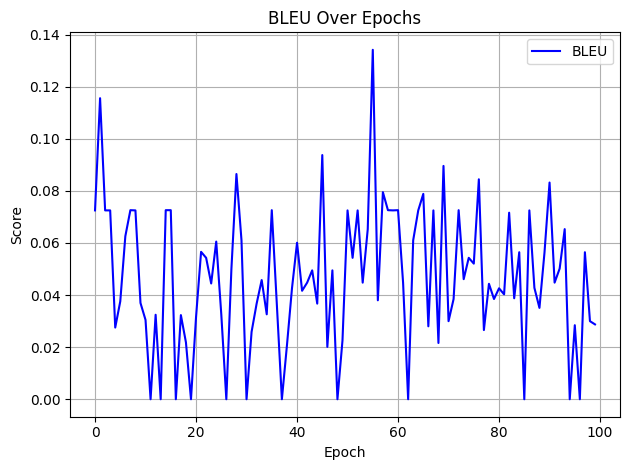

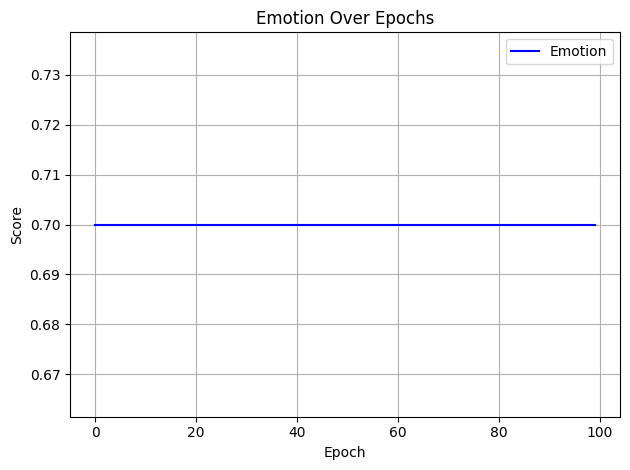

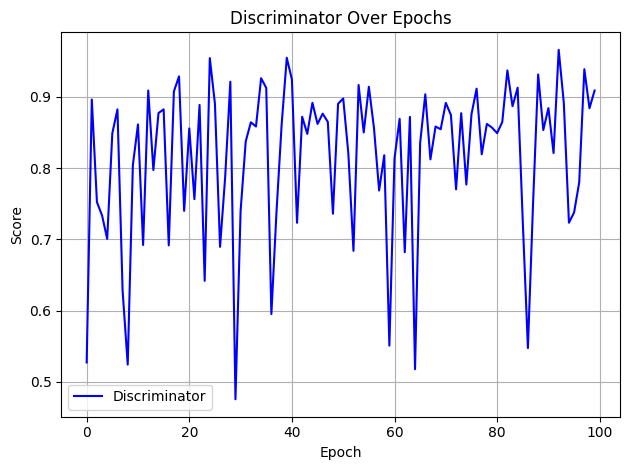

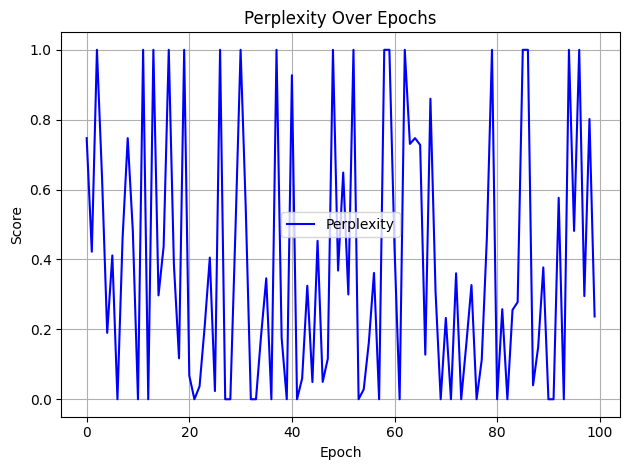

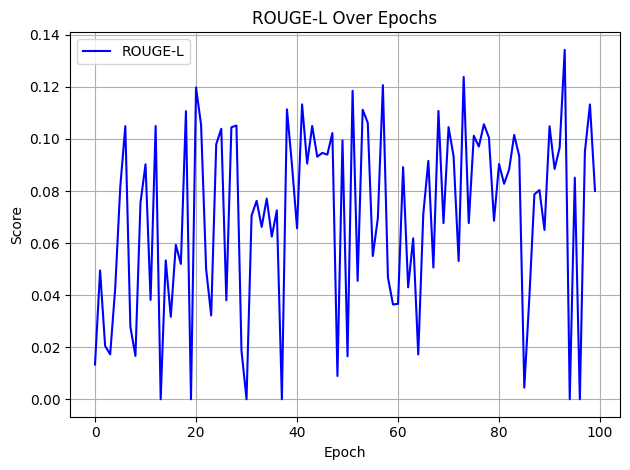

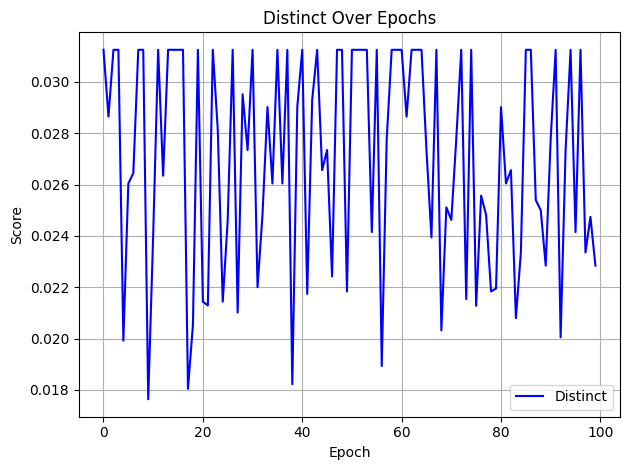

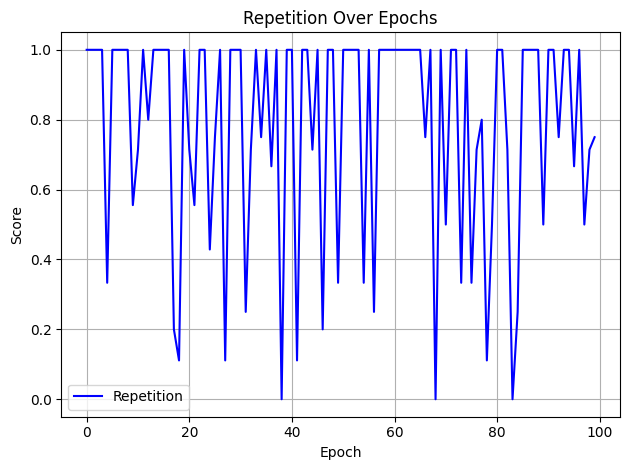

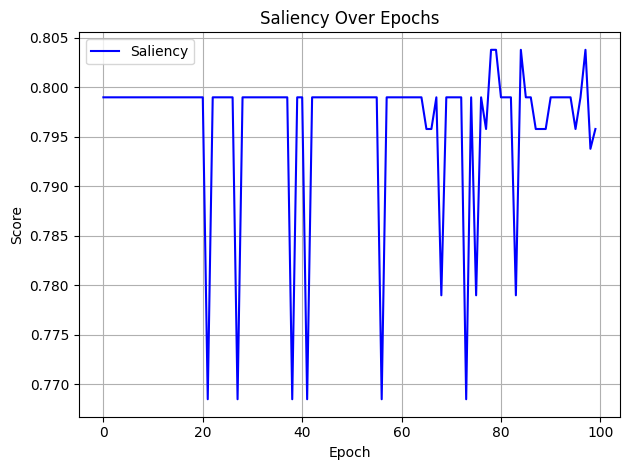

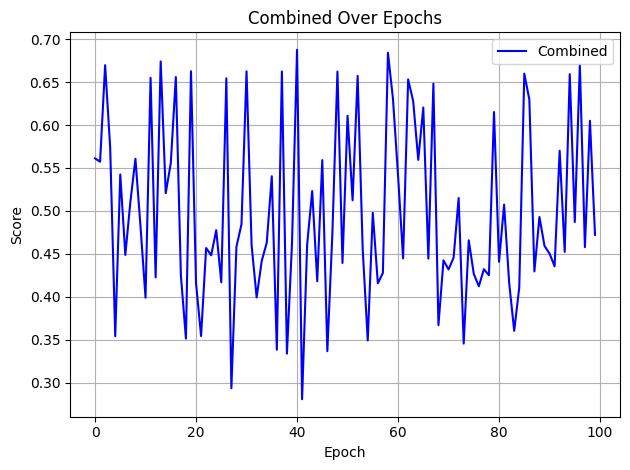

In [129]:
import matplotlib.pyplot as plt

def plot_individual_rewards_on_screen(reward_dict):
    """
    Plots each reward component in a separate graph on screen.

    Args:
        reward_dict (dict): Dictionary with reward names as keys and lists of values as values.
    """
    for name, values in reward_dict.items():
        plt.figure()
        plt.plot(values, label=name, color='blue')
        plt.title(f"{name} Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Score")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()  # 👈 Shows the plot on screen
plot_individual_rewards_on_screen(reward_components_over_epochs)


In [130]:
def sample_with_temperature(preds, temperature=1.0, top_k=20, forbid_token=None):
    preds = np.asarray(preds).astype('float64')

    if forbid_token is not None and forbid_token < len(preds):
        preds[forbid_token] = 0

    preds = np.log(preds + 1e-10) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    top_indices = preds.argsort()[-top_k:]
    top_probs = preds[top_indices]
    top_probs /= np.sum(top_probs)

    return np.random.choice(top_indices, p=top_probs)

def sample_with_top_p(preds, temperature=1.0, top_p=0.9):
    preds = np.log(preds + 1e-10) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    sorted_indices = np.argsort(preds)[::-1]
    sorted_probs = preds[sorted_indices]
    cumulative_probs = np.cumsum(sorted_probs)

    cutoff = np.where(cumulative_probs > top_p)[0]
    cutoff_index = cutoff[0] + 1 if len(cutoff) > 0 else len(preds)

    selected_indices = sorted_indices[:cutoff_index]
    selected_probs = preds[selected_indices]
    selected_probs /= np.sum(selected_probs)

    sampled_idx = np.random.choice(selected_indices, p=selected_probs)
    return sampled_idx, selected_indices, selected_probs



def safe_index_to_word(idx, index_to_word):
    word = index_to_word.get(idx, "<unk>")
    if word.startswith("<") and word.endswith(">"):  # like <unk>, <pad>, <name>
        return ""
    return word

def apply_pos_penalty(preds, generated, index_to_word):
    words = [safe_index_to_word(tok, index_to_word) for tok in generated if tok not in [0, 1, 2]]
    text = " ".join(words)
    doc = nlp(text)
    pos_counts = {"VERB": 0, "NOUN": 0, "ADJ": 0}

    verb_lemmas = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1


    verb_lemmas = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    lemma_counts = {lemma: verb_lemmas.count(lemma) for lemma in set(verb_lemmas)}
    # === Guard Conditions ===
    if pos_counts["VERB"] == 0:
        return preds  # Do not penalize if sentence has no verbs at all
    scaling_factor = min(1.0, len(doc) / 8.0)
    for idx, word in index_to_word.items():
        if idx in generated:
            # ✅ Penalize repeating verb lemmas (if sentence has enough verbs)
            if word in lemma_counts and lemma_counts[word] > 1 and pos_counts["VERB"] >= 2:
                 preds[idx] *= 1.0 - 0.2 * (lemma_counts[word] - 1) * scaling_factor

            # ✅ Penalize any token that appears >= 3 times (not just verbs)
            if generated.count(idx) >= 3:
                preds[idx] *= 0.7

    return preds
def apply_ngram_penalty(preds, generated,index_to_word, n=3, penalty=0.5):
    """
    Apply penalty to n-grams that already appeared in the generated sequence.

    Args:
        preds (np.array): Probabilities of the next token.
        generated (list): List of generated token IDs so far.
        n (int): Size of n-gram to penalize.
        penalty (float): Penalty factor (0 < penalty < 1).

    Returns:
        np.array: Modified prediction probabilities.
    """
    if len(generated) < n - 1:
        return preds

    current_prefix = tuple(generated[-(n - 1):])
    current_words = [index_to_word.get(tok, "") for tok in current_prefix]

    for idx in range(len(preds)):
        candidate_ngram = current_prefix + (idx,)
        candidate_words = current_words + [index_to_word.get(idx, "")]
        candidate_set = set(candidate_words)

        for i in range(len(generated) - n + 1):
            past_ngram = generated[i:i + n]
            past_words = [index_to_word.get(tok, "") for tok in past_ngram]
            past_set = set(past_words)

            # Full match → heavy penalty
            if candidate_words == past_words:
                preds[idx] *= penalty
                break

            # Soft match (Jaccard similarity)
            jaccard = len(candidate_set & past_set) / (len(candidate_set | past_set) + 1e-6)
            if jaccard > 0.7:
                preds[idx] *= penalty * 0.8
                break
            elif candidate_words[-1] in past_words:
                preds[idx] *= penalty * 0.9

    return preds
def requires_followup(word):
    if not word:
        return False
    word = word.lower()
    force_follow_words = {
        "a", "an", "the", "this", "that", "these", "those",
        "to", "in", "on", "at", "with", "by", "for", "of", "from", "about", "under", "over", "into", "without",
        "and", "or", "but", "because", "although", "so", "if", "unless", "while",
        "not", "never", "no", "is", "are", "was", "were", "be", "have", "has", "will", "would", "should", "can", "could", "might", "must", "do", "does", "did"
    }
    return word in force_follow_words
def refine_beam_output(sequence, index_to_word, pad_token=0, end_token=2):
    """
    Cleans up the generated sequence by removing consecutive duplicates,
    redundant tokens, and ensuring sentence logic.
    """
    refined = []
    prev_word = None

    for idx in sequence:
        word = index_to_word.get(idx, "<unk>")
        if word == "<start>":
            continue
        if word == prev_word:
            continue
        refined.append(idx)
        prev_word = word

    # Ensure end_token exists
    if end_token not in refined:
        refined.append(end_token)

    return refined

def is_content_word(word):
    if not word or not word.isalpha():
        return False
    pos = nlp(word)[0].pos_
    return pos in {"NOUN", "VERB", "ADJ", "ADV"}

def penalize_function_repeats(seq, index_to_word):
    words = [index_to_word.get(tok, "") for tok in seq]
    for i in range(len(words) - 1):
        w1 = words[i].lower()
        w2 = words[i + 1].lower()
        if w1 in stopwords.words("english") and w2 in stopwords.words("english"):
            return True
    return False
def violates_function_sequence_constraint(prev_word, curr_word):
    return is_function_word(prev_word) and is_function_word(curr_word)

stopwords_set = set(stopwords.words('english'))

def is_function_word(word):
    return word.lower() in stopwords_set
import numpy as np

def generate_from_generator(generator, word_to_index, index_to_word,
                             num_samples=3, max_length=10, temperature=0.7,
                             top_k=20, mode="temperature", beam_width=3):
    start_token = word_to_index.get('<start>', 1)
    pad_token = word_to_index.get('<pad>', 0)
    end_token = word_to_index.get('<end>', 2)

    results = []

    if mode == "temperature":
        for _ in range(num_samples):
            for _attempt in range(20):  # Retry loop for quality enforcement
                generated = [start_token]
                recent_ngrams = set()

                for t in range(1, max_length):
                    padded = pad_sequences([generated], maxlen=max_length, padding='post')
                    preds = generator.predict(padded, verbose=0)[0][len(generated) - 1]

                    # 1️⃣ Penalize token overuse
                    token_counts = {tok: generated.count(tok) for tok in set(generated)}
                    for tok, count in token_counts.items():
                        if count >= 2:
                            preds[tok] *= 0.4
                        elif count == 1:
                            preds[tok] *= 0.7

                    # 2️⃣ Penalize repeated bigrams
                    if len(generated) >= 2:
                        last_bigram = tuple(generated[-2:])
                        if last_bigram in set(tuple(generated[i:i + 2]) for i in range(len(generated) - 2)):
                            preds[last_bigram[1]] *= 0.01

                    # 3️⃣ Penalize overused stopwords
                    stopwords_set = set(stopwords.words('english'))
                    for idx, word in index_to_word.items():
                        if word in stopwords_set and generated.count(idx) >= 2:
                            preds[idx] *= 0.2

                    # 4️⃣ Encourage ending the sentence if it's long enough
                    content_tokens = [tok for tok in generated if tok not in [start_token, end_token, pad_token]]
                    if len(content_tokens) < 4:
                        preds[end_token] *= 0.2
                    if t <= 3:
                        preds[end_token] = 0
                    if t < 6:
                        preds[end_token] *= 0.2
                    if t >= max_length - 2:
                        preds[end_token] *= 2.5
                    if t >= 8:
                        preds[end_token] *= 1.5
                    if t >= 10:
                        preds[end_token] *= 0.5
                    if t > 2:
                        prev_word = index_to_word.get(generated[-1], "")
                        if requires_followup(prev_word):
                            preds[end_token] *= 0.05
                    # 5️⃣ Normalize probabilities and apply n-gram penalty , (4, 0.3), (5, 0.25)
                    preds = np.maximum(preds, 1e-8)
                    preds /= np.sum(preds)
                    for n, penalty in [(2, 0.7), (3, 0.5)]:
                        if len(generated) >= n:
                            preds = apply_ngram_penalty(preds, generated, index_to_word, n=n, penalty=penalty)
                    # 🆕 ⬇️ Apply POS-based penalty (e.g., repeated verbs)
                    preds = apply_pos_penalty(preds, generated, index_to_word)


                    # 🎯 Sample using Top-p
                    token, selected_indices, selected_probs = sample_with_top_p(preds, temperature=temperature, top_p=0.9)
                    curr_word = index_to_word.get(token, "")
                    if token == start_token and t > 1:
                        allowed = [i for i in range(len(preds)) if i != start_token]
                        token = np.random.choice(allowed, p=preds[allowed] / np.sum(preds[allowed]))
                    # ❌ Prevent exact word repetition
                    if len(generated) >= 1:
                        prev_word = index_to_word.get(generated[-1], "")
                        curr_word = index_to_word.get(token, "")
                        curr_word = index_to_word.get(token, "")
                        if prev_word == curr_word:
                            allowed = [i for i in range(len(preds)) if index_to_word.get(i, "") != curr_word]
                            if allowed:
                                probs = preds[allowed]
                                probs /= np.sum(probs)
                                token = np.random.choice(allowed, p=probs)
                        if token == generated[-1]:
                            allowed = [i for i in range(len(preds)) if i != token]
                            if allowed:
                                probs = preds[allowed]
                                probs /= np.sum(probs)
                                token = np.random.choice(allowed, p=probs)
                                curr_word = index_to_word.get(token, "")
                        if curr_word == prev_word:
                            allowed = [i for i in range(len(preds)) if index_to_word.get(i, "") != curr_word]
                            if allowed:
                                probs = preds[allowed]
                                probs /= np.sum(probs)
                                token = np.random.choice(allowed, p=probs)
                                curr_word = index_to_word.get(token, "")

                        if violates_function_sequence_constraint(prev_word, curr_word):
                            allowed = [i for i in range(len(preds))
                                      if not violates_function_sequence_constraint(prev_word, index_to_word.get(i, ""))]
                            if allowed:
                                probs = preds[allowed]
                                probs /= np.sum(probs)
                                token = np.random.choice(allowed, p=probs)
                                curr_word = index_to_word.get(token, "")
                    # ❌ Prevent 2 out of last 3 words from being equal
                    if len(generated) >= 2:
                        w1 = index_to_word.get(generated[-2], "")
                        w2 = index_to_word.get(generated[-1], "")
                        w3 = index_to_word.get(token, "")
                        if w1 == w2 or w2 == w3 or w1 == w3:
                            allowed = [i for i in range(len(preds))
                                      if index_to_word.get(i, "") not in {w1, w2, w3}]
                            if allowed:
                                probs = preds[allowed]
                                probs /= np.sum(probs)
                                token = np.random.choice(allowed, p=probs)

                    # ❌ Prevent token ID repetition
                    if token == generated[-1]:
                        allowed = [i for i in range(len(preds)) if i != token]
                        if allowed:
                            probs = preds[allowed]
                            probs /= np.sum(probs)
                            token = np.random.choice(allowed, p=probs)

                    # Add token to the sequence
                    generated.append(token)

                    if token == end_token:
                        break

                # Post-processing: finalize sequence
                if end_token not in generated:
                    generated.append(end_token)
                generated += [pad_token] * (max_length - len(generated))

                # ✅ Evaluate discriminator score
                padded = pad_sequences([generated], maxlen=max_length, padding='post')
                real_score = disc_model.predict(padded, verbose=0)[0][0]
                real_score = float(real_score)
                if real_score >= 0.63:
                    results.append(generated)
                    # print(f"✅ Accepted (Discriminator score = {real_score:.4f})")
                    break
                else:
                    print(f"🔁 Rejected (Score = {float(real_score):.4f}), retrying...")
                    # continue
            else:
                print("❌ Failed after 20 attempts – saving last try")
                results.append(generated)



    elif mode == "beam":
        no_repeat_ngram_size = 3
        token_repeat_penalty = 0.8
        diversity_penalty = 1.2  # 🆕 Penalty for similar sequences

        for _ in range(num_samples):
            sequences = [[[start_token], 1.0]]
            for _ in range(max_length - 1):
                all_candidates = []

                for seq, score in sequences:
                    if seq[-1] == end_token:
                        all_candidates.append((seq, score))
                        continue

                    padded = pad_sequences([seq], maxlen=max_length, padding='post')
                    preds = generator.predict(padded, verbose=0)[0][len(seq) - 1]

                    # 📉 Penalty for frequent tokens
                    token_counts = {tok: seq.count(tok) for tok in set(seq)}
                    for tok, count in token_counts.items():
                        preds[tok] *= token_repeat_penalty ** count

                    # ✅ Boost end_token near end
                    if len(seq) >= max_length - 2:
                        preds[end_token] *= 2.0

                    # 🧼 Safe normalization
                    preds = np.maximum(preds, 1e-8)
                    preds /= np.sum(preds)

                    # 🔀 Soft top-k with shuffle
                    top_k_candidates = np.argsort(preds)[-beam_width * 2:]
                    np.random.shuffle(top_k_candidates)  # 🆕 Shuffle for variety

                    for idx in top_k_candidates[:beam_width]:
                        # 🚫 Repeated token ID
                        if len(seq) >= 1 and idx == seq[-1]:
                            continue

                        # 🚫 Same word repetition
                        if len(seq) >= 1:
                            prev_word = index_to_word.get(seq[-1], "")
                            curr_word = index_to_word.get(idx, "")
                            if prev_word == curr_word:
                                continue

                        # 🚫 Repeated n-gram
                        if len(seq) >= no_repeat_ngram_size - 1:
                            ngram = tuple(seq[-(no_repeat_ngram_size - 1):] + [idx])
                            history = [tuple(seq[i:i + no_repeat_ngram_size])
                                      for i in range(len(seq) - no_repeat_ngram_size + 1)]
                            if ngram in history:
                                continue

                        # 🧠 Length-normalized score
                        new_score = score * preds[idx] / (len(seq) + 1e-6)

                        candidate_seq = seq + [idx]

                        # 🧪 Diversity penalty
                        for existing_seq, _ in all_candidates:
                            if candidate_seq[:len(existing_seq)] == existing_seq:
                                new_score /= diversity_penalty

                        all_candidates.append((candidate_seq, new_score))

                if not all_candidates:
                    break

                # 📊 Sort & retain top beams
                sequences = sorted(all_candidates, key=lambda tup: tup[1], reverse=True)[:beam_width]

            if not sequences:
                sequences = [[[start_token], 1.0]]

            best_sequence = sequences[0][0]
            if end_token not in best_sequence:
                best_sequence.append(end_token)

            best_sequence += [pad_token] * (max_length - len(best_sequence))
            results.append(best_sequence)

            # content_words = [index_to_word.get(tok, "") for tok in best_sequence if index_to_word.get(tok, "") not in stopwords_set]
            # if len(content_words) < 3:
            #     print("❌ Rejected due to low content word count")
            #     continue

            padded = pad_sequences([best_sequence], maxlen=max_length, padding='post')
            real_score = float(disc_model.predict(padded, verbose=0)[0][0])

            if real_score >= 0.7:
                results.append(best_sequence)
            else:
                print(f"🔁 Rejected (Score = {real_score:.4f}), retrying...")
                results.append(best_sequence)





    # 🧠 Decode
    decoded_texts = []
    for seq in results:
        decoded = [index_to_word.get(i, '<unk>') for i in seq if i != pad_token]
        decoded_texts.append(" ".join(decoded))

    return decoded_texts


def encode_sequence(text, word_to_index, max_length):
    tokens = text.split()
    indexed = [word_to_index.get(token, word_to_index['<oov>']) for token in tokens]
    padded = pad_sequences([indexed], maxlen=max_length, padding='post')
    return padded[0]


In [131]:
samples = generate_from_generator(generator, word_to_index, index_to_word,
                                  num_samples=5, max_length=max_length, temperature=0.8)

for i, text in enumerate(samples):
    print(f"🔹 Fake Sample #{i+1}: {text}")

<ipython-input-130-0da1b8519354>:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  real_score = float(real_score)


🔁 Rejected (Score = 0.5282), retrying...
🔁 Rejected (Score = 0.5392), retrying...
🔹 Fake Sample #1: <start> i watch probably in insane my <end>
🔹 Fake Sample #2: <start> in much i width to seekers <end>
🔹 Fake Sample #3: <start> i've ulema. my oh, to is holding a haunting cant of presidency the rip. <end>
🔹 Fake Sample #4: <start> arghh! physically to the kidnapped. is happen and life drink street. <end>
🔹 Fake Sample #5: <start> patch. better danger. that strange a cautious damn be countries the hornets. <end>


In [132]:
def decode_sequence(seq):
    return " ".join([index_to_word.get(i, "<unk>") for i in seq])

print("\n🔍 disc_model predictions:")

# for i in range(5):
#     pred = disc_model.predict(np.array([real_samples[i]]), verbose=0)[0][0]
#     print(f"🟢 Real #{i+1} | Score: {pred.item():.4f} | Text: {decode_sequence(real_samples[i])}")

# for i in range(5):
#     pred = disc_model.predict(np.array([fake_samples[i]]), verbose=0)[0][0]
#     print(f"🔴 Fake #{i+1} | Score: {pred.item():.4f} | Text: {decode_sequence(fake_samples[i])}")


def encode_sequence(text, word_to_index, max_length):
    tokens = text.split()
    indexes = [word_to_index.get(tok, word_to_index['<oov>']) for tok in tokens]
    return pad_sequences([indexes], maxlen=max_length, padding='post')[0]

print("\n🔍 disc_model predictions on sampled generated texts (temperature sampling):")

#,1.6,1.9,3.0,5.0
for temp in [0.1,0.3,0.5,0.7,0.8,0.9,1.0,1.3,1.5,1.6,1.9,3.0,5.0]:
    print(f"\n🌡️ Temperature: {temp}")
    generated_texts = generate_from_generator(
        generator, word_to_index, index_to_word,
        num_samples=5, max_length=max_length,
        temperature=temp, mode="temperature"
    )

    for i, text in enumerate(generated_texts):
        encoded = encode_sequence(text, word_to_index, max_length)
        score = disc_model.predict(np.array([encoded]), verbose=0)[0][0]
        print(f"🔹 Sample #{i+1} | Score: {score.item():.4f} | Text: {text}")




# beam_configs = [
#     # Basic config – short and focused
#     {"max_length": max_length, "beam_width": 2, "diversity_penalty": 1.0, "no_repeat_ngram_size": 2},

#     # Medium config – with a bit more diversity
#     {"max_length": max_length, "beam_width": 3, "diversity_penalty": 1.2, "no_repeat_ngram_size": 3},

#     # Long and wide – aims for narrative richness
#     {"max_length": max_length, "beam_width": 5, "diversity_penalty": 1.5, "no_repeat_ngram_size": 3},

#     # Ultra config – maximum length and high diversity
#     {"max_length": max_length, "beam_width": 4, "diversity_penalty": 1.7, "no_repeat_ngram_size": 4},

#     # Minimalist config – short and quick idea generation
#     {"max_length": max_length, "beam_width": 2, "diversity_penalty": 0.9, "no_repeat_ngram_size": 2},

#     # Experimental config – low beam, high penalty for repetition
#     {"max_length": max_length, "beam_width": 2, "diversity_penalty": 2.0, "no_repeat_ngram_size": 4},
# ]
# print("\n🔍 disc_model predictions on sampled generated texts (beam search):")

# for cfg_idx, cfg in enumerate(beam_configs):
#     print(f"\n🛠️ Config #{cfg_idx+1}: max_length={cfg['max_length']}, beam_width={cfg['beam_width']}")

#     generated_beam = generate_from_generator(
#         generator,
#         word_to_index,
#         index_to_word,
#         num_samples=5,
#         max_length=cfg["max_length"],
#         beam_width=cfg["beam_width"],
#         mode="beam"
#     )

#     for i, text in enumerate(generated_beam):
#         encoded = encode_sequence(text, word_to_index, cfg["max_length"])
#         score = disc_model.predict(np.array([encoded]), verbose=0)[0][0]
#         print(f"🔴 Fake (Beam) #{i+1} | Score: {score.item():.4f} | Text: {text}")



🔍 disc_model predictions:

🔍 disc_model predictions on sampled generated texts (temperature sampling):

🌡️ Temperature: 0.1


<ipython-input-130-0da1b8519354>:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  real_score = float(real_score)


🔹 Sample #1 | Score: 0.9309 | Text: <start> is hurt" the picture. <end>
🔹 Sample #2 | Score: 0.9036 | Text: <start> are vid the worse. <end>
🔹 Sample #3 | Score: 0.8039 | Text: <start> said trouble. is employment <end>
🔹 Sample #4 | Score: 0.9268 | Text: <start> need is the well <end>
🔹 Sample #5 | Score: 0.9549 | Text: <start> torture like the including <end>

🌡️ Temperature: 0.3
🔁 Rejected (Score = 0.5936), retrying...
🔁 Rejected (Score = 0.3666), retrying...
🔹 Sample #1 | Score: 0.8269 | Text: <start> there cereal i nonchalant is beautifully <end>
🔹 Sample #2 | Score: 0.8536 | Text: <start> that scooby the being, <end>
🔹 Sample #3 | Score: 0.8321 | Text: <start> everyone combined i people is drop <end>
🔹 Sample #4 | Score: 0.8589 | Text: <start> terrorists graduated that healthy <end>
🔹 Sample #5 | Score: 0.7945 | Text: <start> made would is i <end>

🌡️ Temperature: 0.5
🔁 Rejected (Score = 0.5993), retrying...
🔁 Rejected (Score = 0.4368), retrying...
🔁 Rejected (Score = 0.4840), ret